# BT4211 Final Project: Credit Card Anaylsis

- CUSTID: Identification of Credit Cardholder (Categorical)

- BALANCE (Available Credit): Difference between credit limit and payments
> After making a payment, you will have more available credit/balance to borrow again.

- BALANCE_FREQUENCY: How frequently the Balance is updated.
> How often is the Balance being increased or decreased. Ranges between 0 and 1 (1 = frequently updated, 0 = not frequently -updated)

- PURCHASES: Amount of purchases made from the account (ONEOFF + INSTALLMENTS)
> Total amount of money spent to purchase stuff with that Account.

- ONEOFF_PURCHASES: Records the Maximum purchase amount did in one-go (one-time payment), doesnt cumulate!
> When a customer makes a single purchase of a product/service via one-time payment

- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
> Total amount of money spent for purchases using Installments

- CASH_ADVANCE: Cash in advance given by the user
> Using a credit card line to get extra cash (Short-term Loan). Typically have higher APRs and starts accruing interest immediately.

- PURCHASES_FREQUENCY: How frequently the Purchases are being made.
> How often is the purchase amount being increased. Ranges between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go.
> How often is the purchases being paid via one-time payment. Ranges between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done.
> How often is the installment purchase amount being increased. Ranges between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
> How often is the Cash Advance being paid off by the customer

- CASH_ADVANCE_TRX: Number of Transactions made with “Cash in Advanced”.
> Total count of Cash Advances (Withdraw Extra Cash) that were made using the credit card line. Out of the total number of times a customer used the card, how many times were used to get cash_advance.

- PURCHASES_TRX: Number of Purchase transactions made.
> Total count of Purchases made.

- CREDIT LIMIT: Limit of Credit Card for user
> Maximum amount that a person can spend on his/her credit card

- PAYMENTS: Amount of Payment done by the user
> Amount of money that the customer pays to their credit card company to repay the amount of money that have borrowed through purchases, cash advances, or any fees/interest charges.

- MINIMUM_PAYMENTS: Minimum amount of payments made by the user
> Lowest amount of money that a cardholder must pay to their credit card company each billing cycle.

- PRC_FULL_PAYMENT: Percent of full payment paid by the user
> Percentage of the Amount of Money owed to the credit card company paid by the user.

- TENURE: Tenure of credit card service for user

## 1. Import Libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import statsmodels.api as sm

from scipy import stats

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, RobustScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, FactorAnalyzer, calculate_kmo
from sklearn.ensemble import IsolationForest
from kneed import KneeLocator
import pingouin as pg

In [3]:
#SKlearn & other ML Packages
import shap
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score, log_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import warnings
warnings.filterwarnings(action="ignore")

## 2. Data

In [5]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#Check for missing/NULL values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8919,0.000000,NaN
8929,0.000000,NaN
8935,0.000000,NaN
8944,0.000000,NaN


In [11]:
#Since all CUST_ID are truly unique, we can drop the column on cust_id
df = df.drop(['CUST_ID'], axis = 1)

#Patching the null values
df = df.dropna(subset = ['CREDIT_LIMIT'])

#patching null values in data set using KNNImputer to avoid bias
null_columns = ['MINIMUM_PAYMENTS']

imputer = KNNImputer()
patches = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns = null_columns)
df = df.fillna(patches)

In [12]:
#check for dupes
df.duplicated().sum()

0

In [13]:
#Monthly Average Purchase over the period the customer has been using the card
df['avg_monthly_purchase'] = df['PURCHASES']/df['TENURE']
                                  
#Monthly Average Cash Advance over the period the customer has been using the card
df['avg_monthly_cash'] = df['CASH_ADVANCE']/df['TENURE']

#Monthly Average Payments over the period the customer has been using the card
df['avg_monthly_installments'] = df['INSTALLMENTS_PURCHASES']/df['TENURE']

#Utilization rate of Credit Card
df['utilisation_ratio'] = df['BALANCE']/df['CREDIT_LIMIT']

#Based on the type of purchases, we can classify or categorise it according to type of purchase they made.
df['type_of_purchase'] = np.where((df['INSTALLMENTS_PURCHASES'] > 0) & (df['ONEOFF_PURCHASES'] == 0), 'Installment',
                        np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] > 0), 'One_off',
                        np.where((df['INSTALLMENTS_PURCHASES'] > 0) & (df['ONEOFF_PURCHASES'] > 0), 'Both', 'Cash')))

In [14]:
df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4301

## 3. Exploratory Data Analysis (EDA)

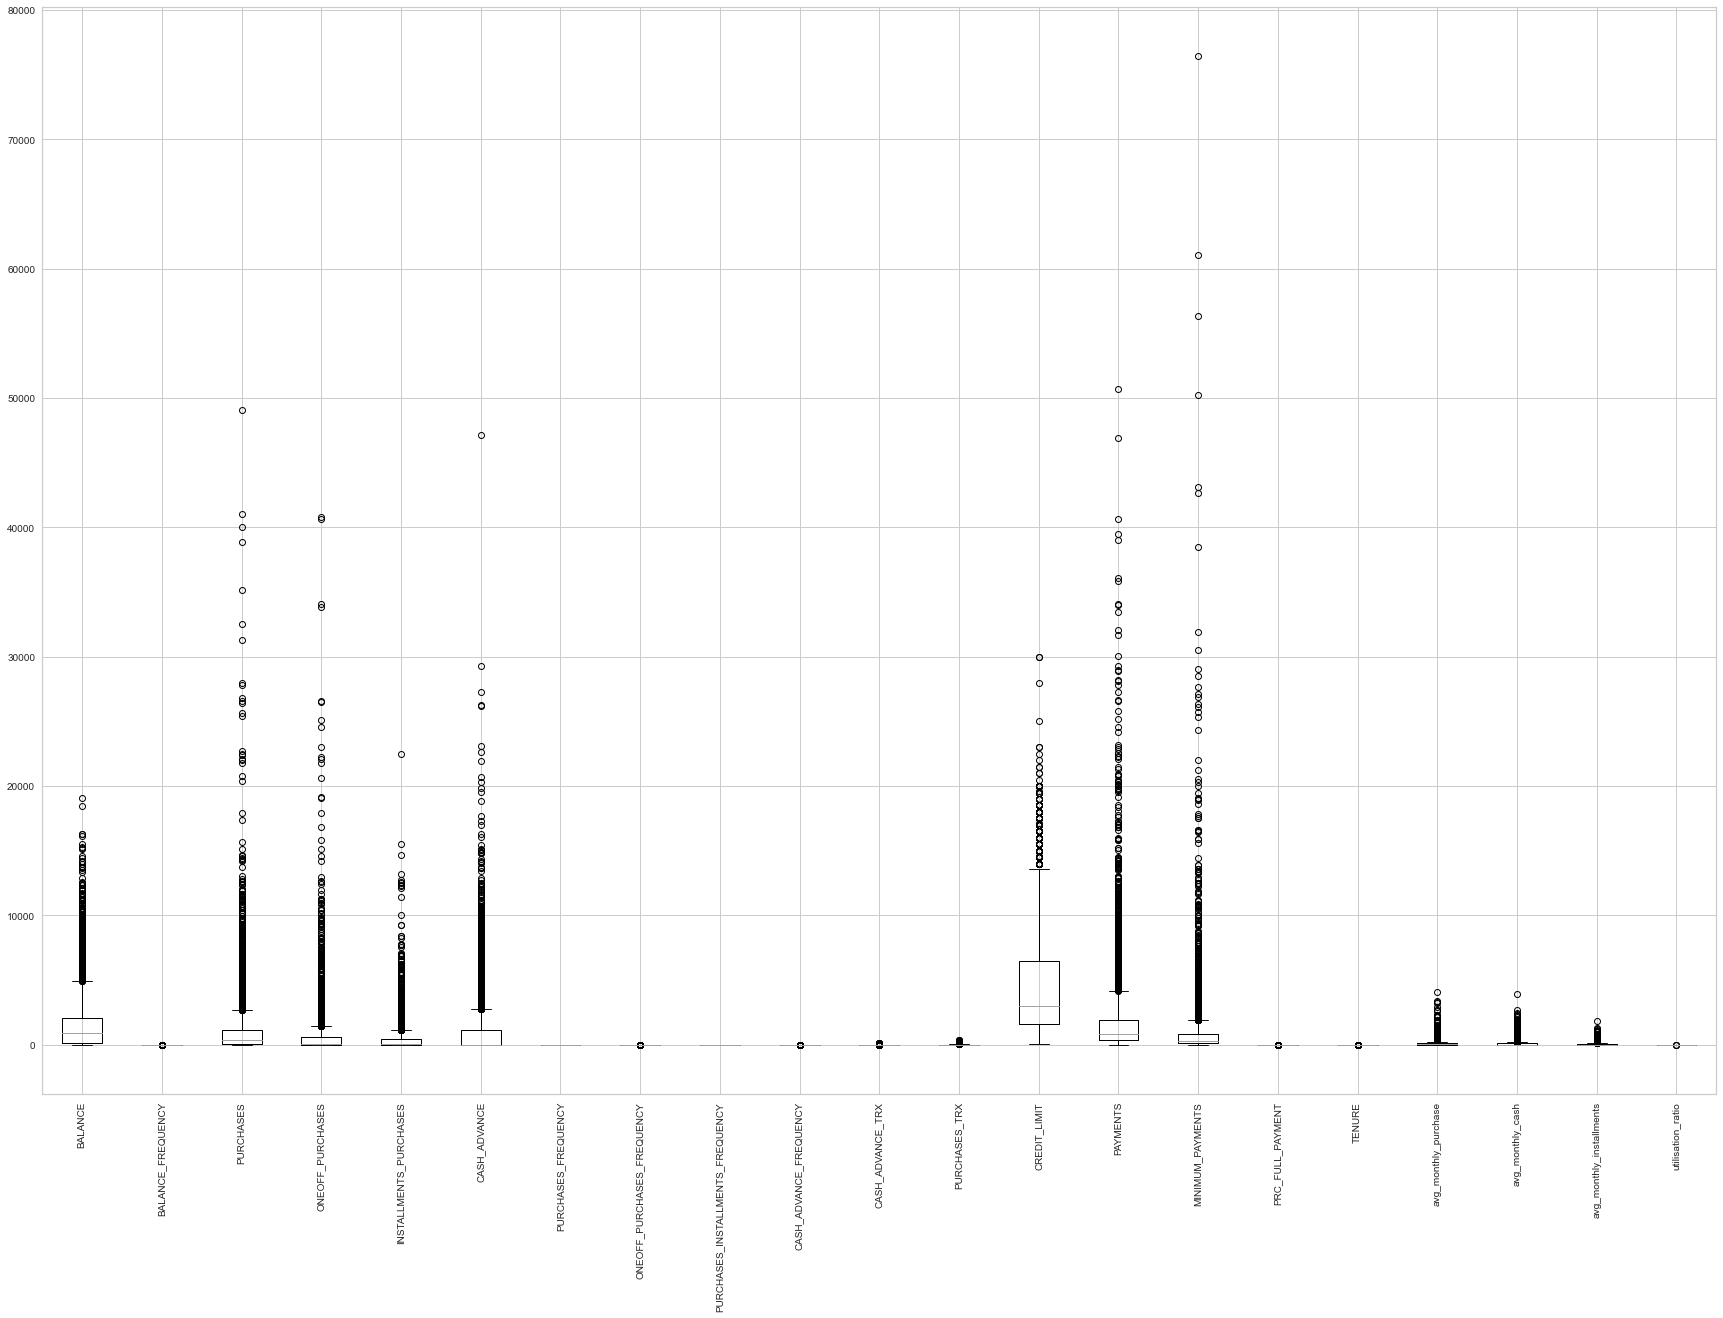

In [15]:
df.boxplot(rot=90 , figsize=(30,20))
plt.show()

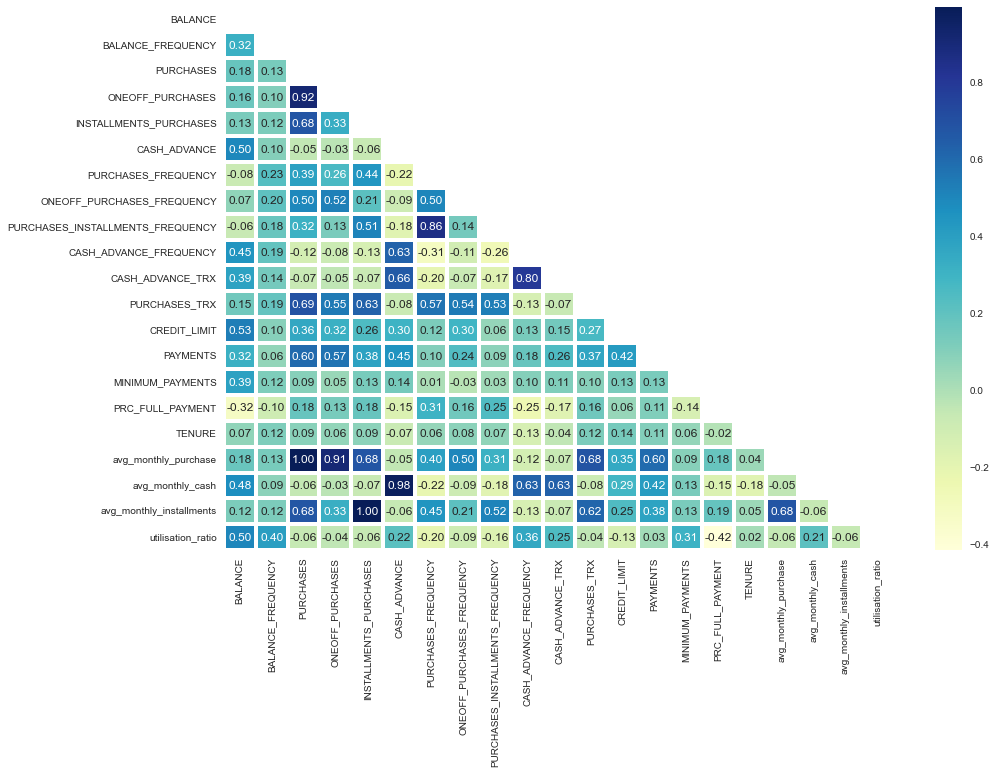

In [16]:
corr = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap='YlGnBu', linewidths=3, fmt=".2f", mask = np.triu(corr))
plt.show()

Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. Payments variable has a high correletion with Purchases and one off Purchases.

Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables. 

"PURACHASES_INSTALLMENTS_FREQUENCY" has strong positive correlation with "PURCHASE FREQUENCY".

"BALANCE" has a strong negative correlation with "PRC_FULL_PAYMENT" while "TENURE" has nearly no correlation with any features. (No linear relationship)

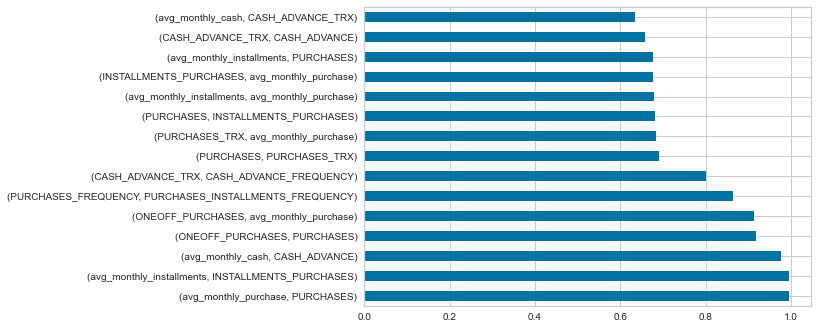

In [17]:
# Creating a bar plot showing the correlation of the numeric features
c = corr.abs()
corr_bar = c.unstack().sort_values(kind='quicksort')
corr_bar = corr_bar.loc[lambda x: x < 1]
corr_bar = corr_bar.drop_duplicates()
corr_bar = corr_bar.sort_values(ascending = False)

#top 15 correlated features.
corr_bar[:15].plot(kind = 'barh')
plt.show()

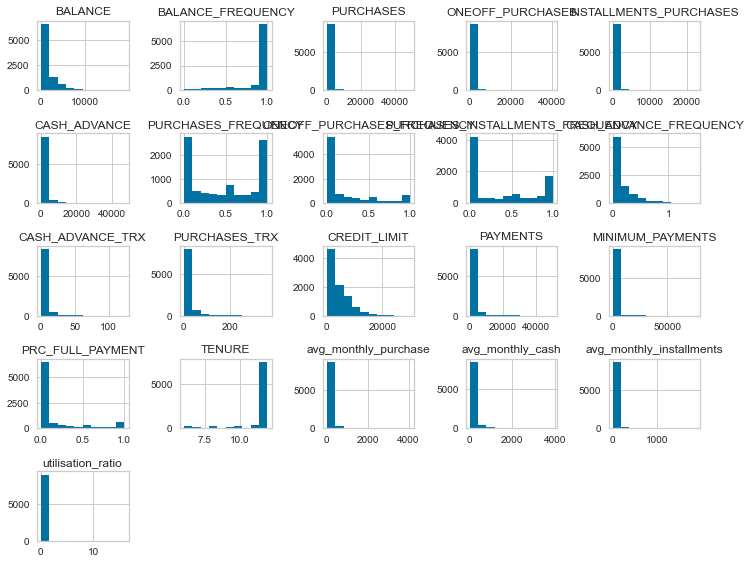

In [18]:
df.hist(figsize=(10,8))
plt.tight_layout()

 Observations

 - As the credit limit increase, the balance also increases and hence, a linear relationship
 - As the number of purchases increases, the number of "cash in advance" transactions decreases
 - As the credit balance is low, the purchases, oneoff_purchases and installments_purchases are also less. Thus validating our assumption from univariate analysis
 - Purchases, oneoff_purchases and installment_purchases are all somehow related linearly
 - As the credit balance is low, the "cash in advance" transactions are less

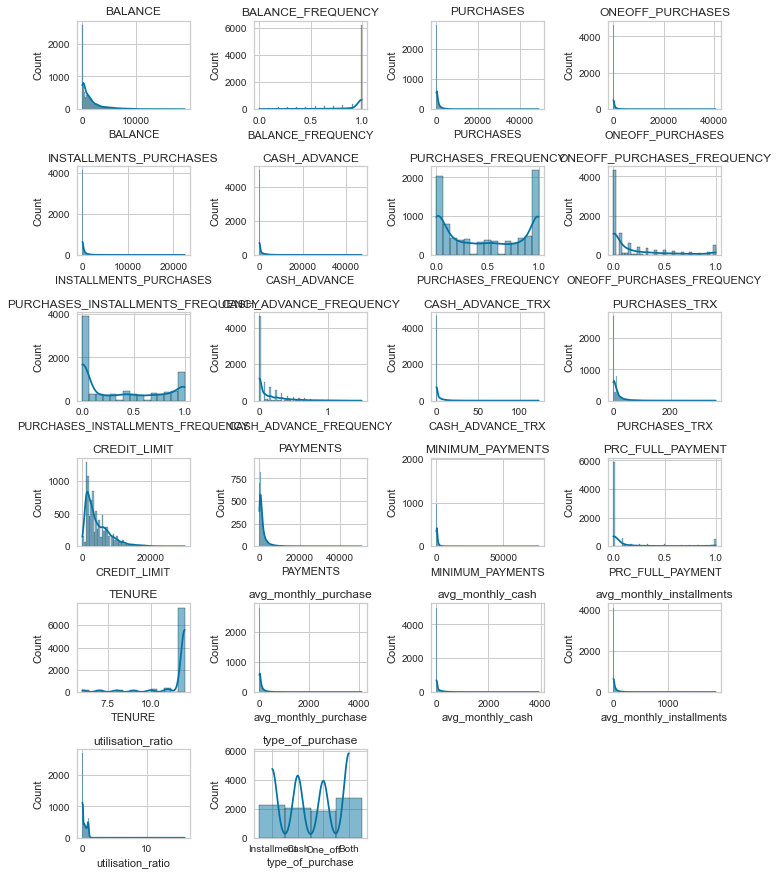

In [19]:
plt.figure(figsize = (10, 20))

for i in range(len(df.columns)):
    plt.subplot(10, 4, i+1)
    sns.histplot(df[df.columns[i]] ,kde = True)
    plt.title(df.columns[i])
    plt.tight_layout()

Observation:

 - Most credit card holders have low credit limit and maintained a rough credit balance below 7500.
 - Variables such as Purchases, OneOff_Purchases, installment_purchases and cash_advances also follow the same trend as credit balance. They could all be related. This can be interpreted where if the credit balance is low, the purchases are also low and so on.
 - Most people either don't purchase anything or they just purchase very frequently.
 - People who purchase in installments is more than people who purchase in one-go.
 - In the last 6 months, most people have made total payments below 10,000, with the minimum payments below 5000.
 - Finally, most of the credit card holders own a card for more than 12 months.

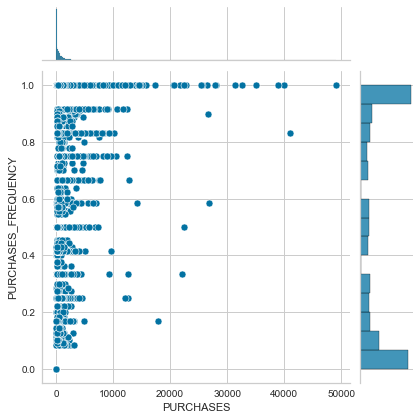

In [20]:
#People who regularly purchase stuff is seen to have cumulative purhcase amount as well.
sns.jointplot(x='PURCHASES', y='PURCHASES_FREQUENCY', data=df)
plt.show()

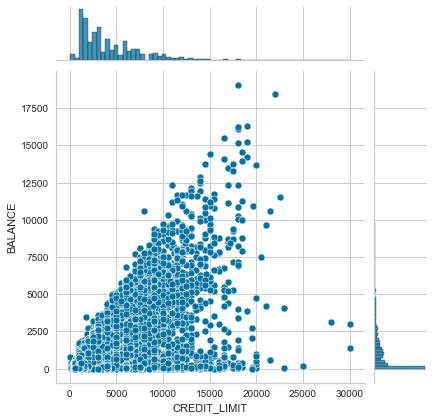

In [21]:
#if a customer's balance increases, their credit limit would also increase
# most customers are under the 15,000 credit limit boundary and $10,000 balance. Customers beyond that can be considered as premium customers.
sns.jointplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
plt.show()

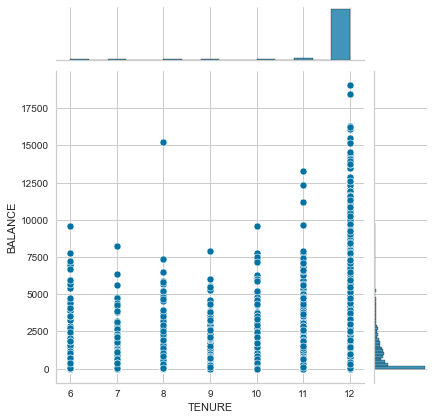

In [22]:
#People with the longest tenure (12) tend to have more balance in their accounts which could imply customer loyalty.
sns.jointplot(x='TENURE', y='BALANCE', data=df)
plt.show()

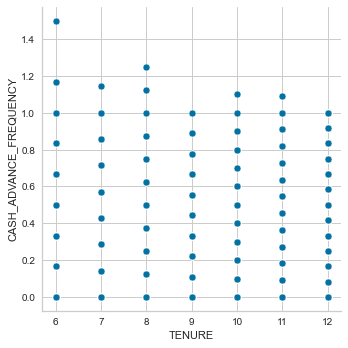

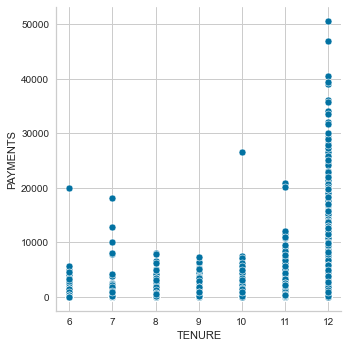

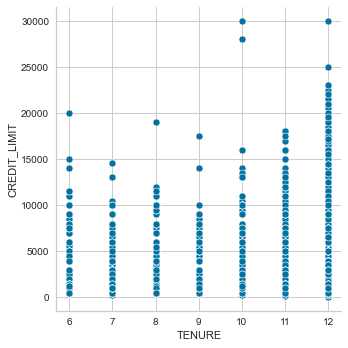

In [23]:
for i in ['CASH_ADVANCE_FREQUENCY', "PAYMENTS", "CREDIT_LIMIT"]:
    sns.relplot(x = 'TENURE', y = i, data = df)
    plt.show()

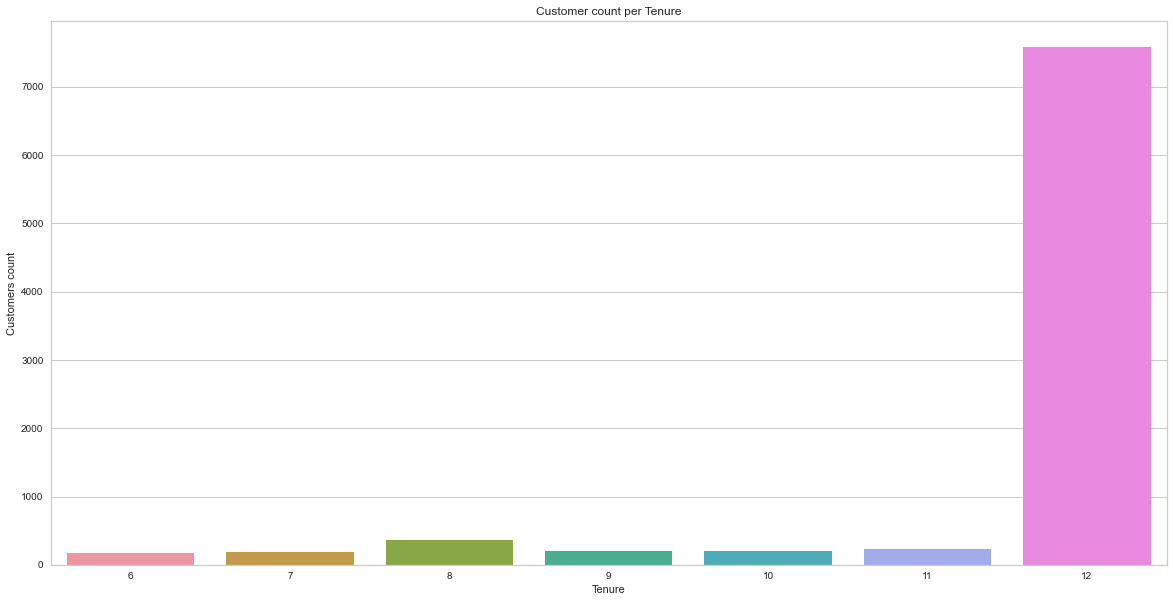

In [24]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = df['TENURE'].unique(), y = df['TENURE'].value_counts(dropna = False))
plt.xlabel('Tenure')
plt.ylabel('Customers count')
plt.title('Customer count per Tenure')
plt.show()

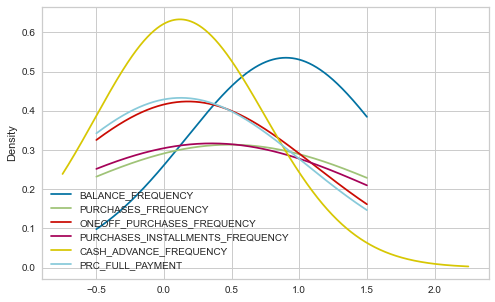

In [25]:
frequency_features = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
                      'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

df[frequency_features].plot.kde(figsize=(8,5), bw_method=3) #,ind=[0, 2, 3,4]
plt.show()

In [26]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'type_of_purchase'],
      dtype='object')

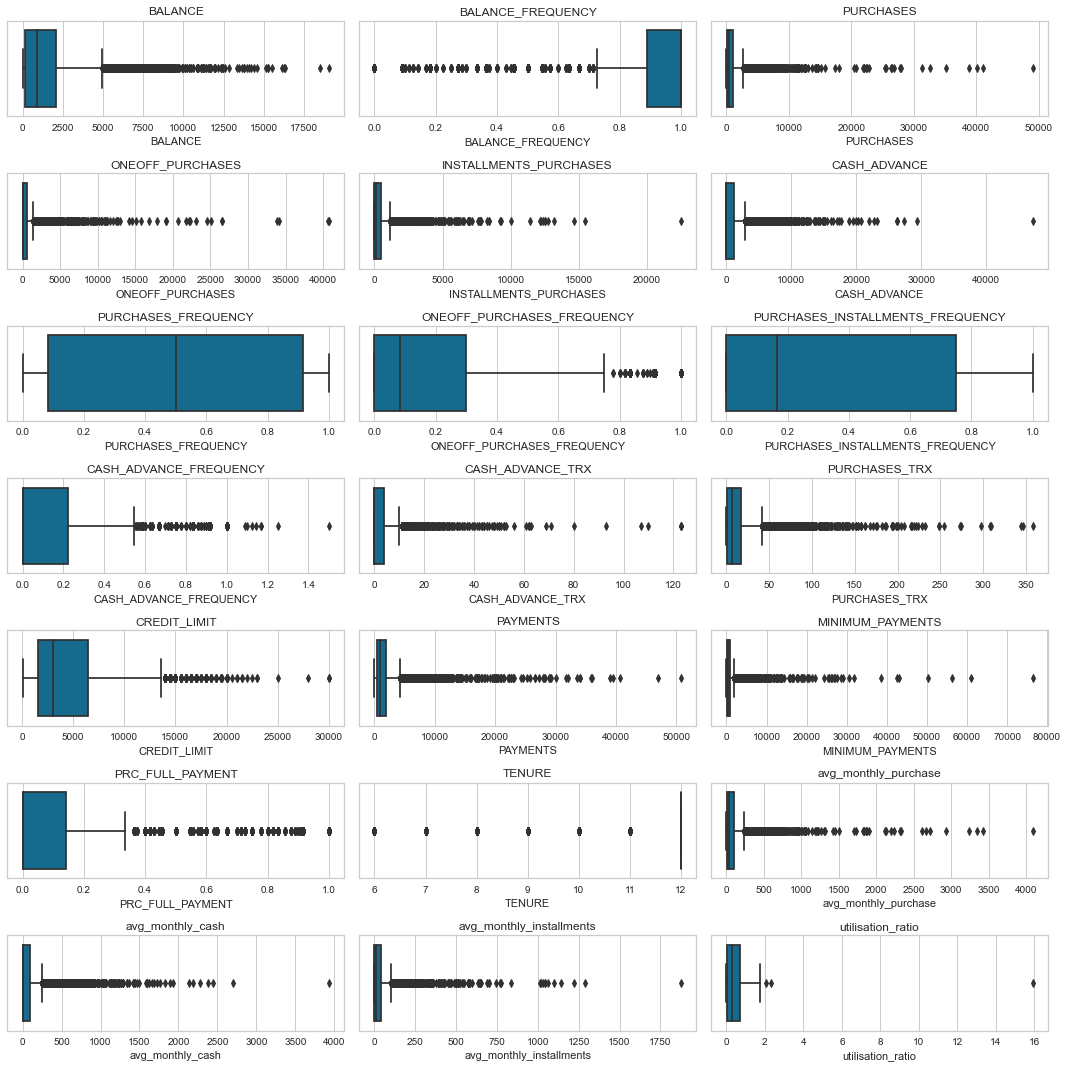

In [27]:
#As observed there is large amount of outliers and distribution isnt normal since they are highly skewed to either sides.
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio']

fig= plt.subplots(nrows = 7 , ncols = 3, figsize=(15,15))
for i in range(len(df[features].columns)):
    plt.subplot(7, 3, i+1)
    ax=  sns.boxplot(x = df[features][df[features].columns[i]])
    plt.title(df[features].columns[i])
    plt.tight_layout()

### Isolation Forest (Remove Outliers)

In [28]:
clean_df = df[features].copy()
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(clean_df)

IsolationForest(contamination=0.1, n_estimators=150)

In [29]:
# Adding 'scores' and 'anomaly' colums to df
scores=model.decision_function(clean_df)
anomaly=model.predict(clean_df)

clean_df['scores']=scores
clean_df['anomaly']=anomaly

anomaly = clean_df.loc[clean_df['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Num of Outliers:', len(anomaly))

Num of Outliers: 895


In [30]:
# dropping outliers
clean_df = clean_df.drop(anomaly_index, axis = 0).reset_index(drop=True)

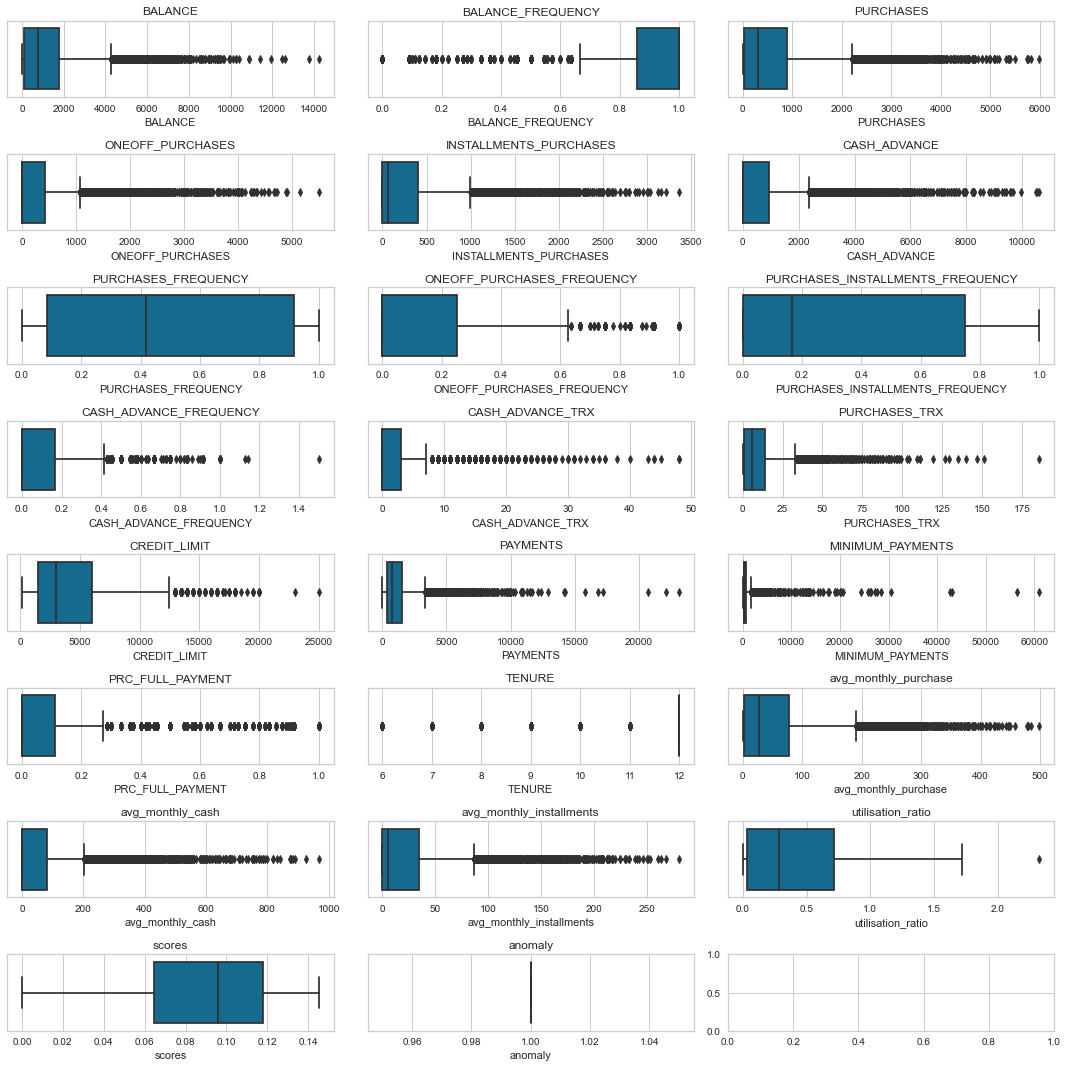

In [31]:
fig= plt.subplots(nrows = 8, ncols = 3, figsize=(15, 15))
for i in range (len(clean_df.columns)):
    plt.subplot(8, 3, i+1)
    ax =  sns.boxplot(x = clean_df[clean_df.columns[i]])
    plt.title(clean_df.columns[i])
    plt.tight_layout()

In [32]:
clean_df.drop(columns='scores' , axis=1 , inplace=True)
clean_df.drop(columns='anomaly' , axis=1 , inplace=True)

In [33]:
scaler= StandardScaler()
scaled_features=scaler.fit_transform(clean_df)
scaled_df=pd.DataFrame(scaler.fit_transform(clean_df), columns = clean_df.columns)
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,avg_monthly_purchase,avg_monthly_cash,avg_monthly_installments,utilisation_ratio
0,-0.759629,-0.209052,-0.627913,-0.533839,-0.413806,-0.536793,-0.743096,-0.631017,-0.662468,-0.673776,...,-0.598920,-0.958757,-0.687996,-0.304136,-0.511291,0.352545,-0.640110,-0.534198,-0.424681,-0.948802
1,1.147590,0.162815,-0.737656,-0.533839,-0.619670,4.265610,-1.163517,-0.631017,-0.876708,0.758057,...,-0.734572,0.945832,1.915994,0.186800,0.278057,0.352545,-0.748140,3.917697,-0.626664,0.221648
2,0.720899,0.534682,0.151757,0.630998,-0.619670,-0.536793,1.359004,3.070215,-0.876708,-0.673776,...,0.079338,1.104548,-0.407478,-0.047427,-0.511291,0.352545,0.127393,-0.534198,-0.626664,-0.129011
3,0.221118,-0.952785,0.986714,1.724515,-0.619670,-0.383404,-0.953307,-0.322582,-0.876708,-0.196500,...,-0.666746,1.104548,-0.822695,0.077314,-0.511291,0.352545,0.949319,-0.392004,-0.626664,-0.439366
4,-0.291016,0.534682,-0.719251,-0.509734,-0.619670,-0.536793,-0.953307,-0.322582,-0.876708,-0.673776,...,-0.666746,-0.895270,-0.369921,-0.248728,-0.511291,0.352545,-0.730022,-0.534198,-0.626664,0.850803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,-0.667530,-0.147076,0.427335,0.991913,-0.619670,-0.536793,-0.322677,0.602726,-0.876708,-0.673776,...,-0.598920,-0.006462,-0.822695,-0.351830,-0.511291,-4.322640,1.545479,-0.534198,-0.626664,-0.927752
8050,-0.767114,0.534682,-0.402767,-0.533839,0.008538,-0.536793,1.359004,-0.631017,1.265704,-0.673776,...,-0.327617,-0.958757,-0.605367,-0.351830,1.264744,-4.322640,-0.088815,-0.534198,0.606065,-0.983661
8051,-0.772730,0.534682,-0.392552,-0.533839,0.027700,-0.536793,1.359004,-0.631017,1.265704,-0.673776,...,-0.327617,-0.958757,-0.638563,-0.334182,-0.511291,-4.322640,-0.068704,-0.534198,0.643667,-1.009819
8052,-0.770187,-0.147076,-0.571546,-0.533839,-0.308069,-0.536793,0.938583,-0.631017,0.837223,-0.673776,...,-0.395443,-0.958757,-0.768448,-0.334182,0.376726,-4.322640,-0.421105,-0.534198,-0.015211,-0.997975


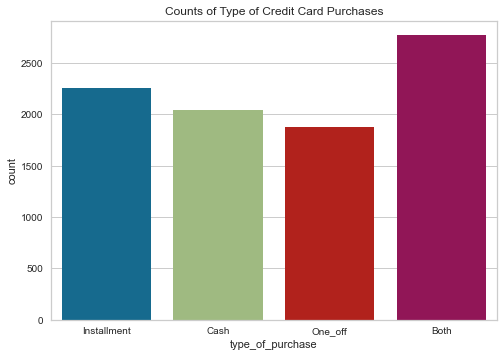

In [34]:
sns.countplot(data = df, x = 'type_of_purchase')
plt.title('Counts of Type of Credit Card Purchases')
plt.show()

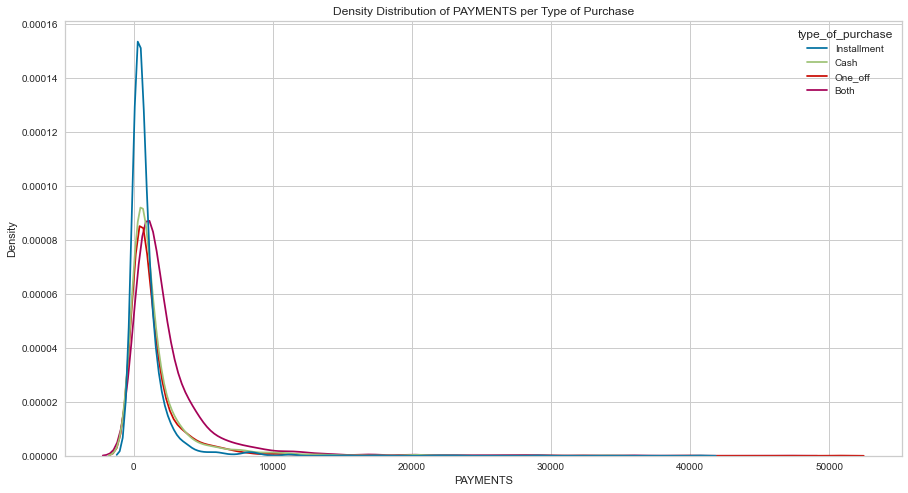

In [35]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df, x='PAYMENTS', hue="type_of_purchase").set(title=f"Density Distribution of PAYMENTS per Type of Purchase")
plt.show()

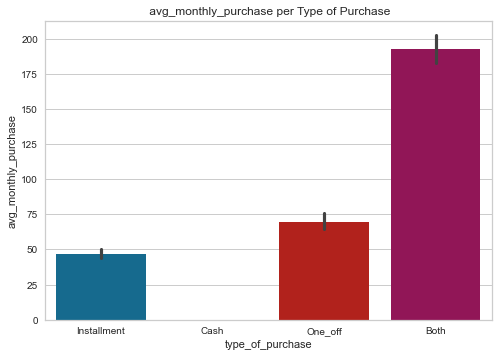

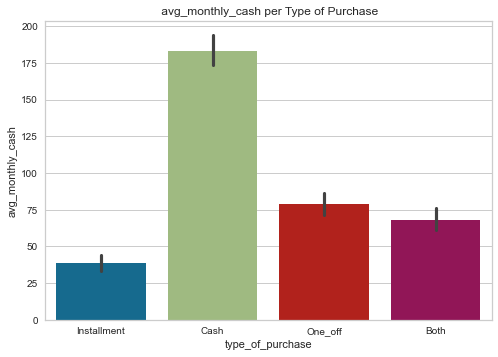

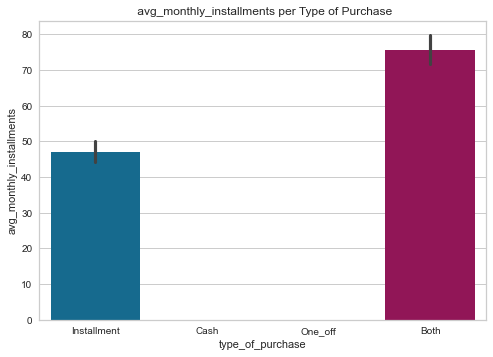

In [36]:
# Visualising spendings on type of purchase
spending_features = ['avg_monthly_purchase', 'avg_monthly_cash','avg_monthly_installments']

for col in spending_features:
    sns.barplot(data = df, x = 'type_of_purchase', y = col).set(title=f" {col} per Type of Purchase")
    plt.show()

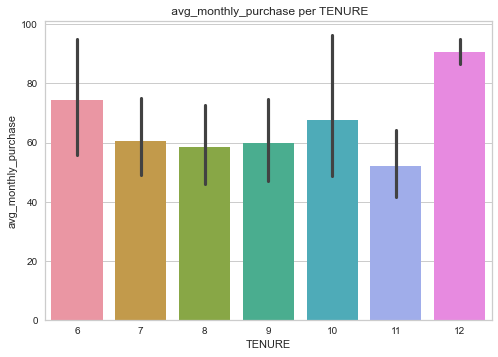

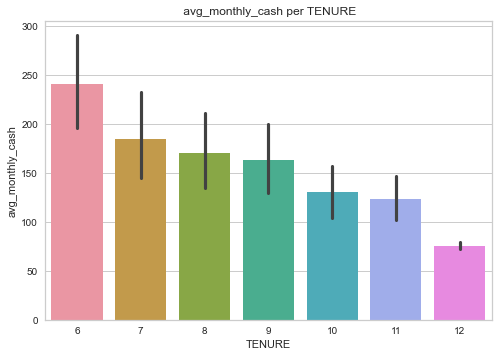

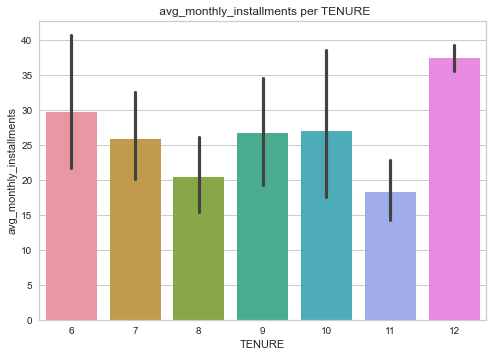

In [37]:
# Visualising spendings on tenure duration
for col in spending_features:
    sns.barplot(data = df, x = 'TENURE', y = col).set(title=f" {col} per TENURE")
    plt.show()

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

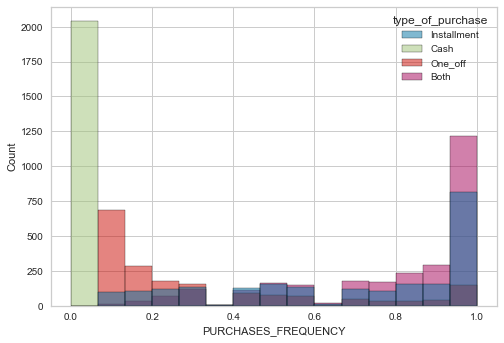

In [38]:
sns.histplot(data = df, x = 'PURCHASES_FREQUENCY', hue = 'type_of_purchase')

In [ ]:
df.columns

## 3. K-means

### Elbow

In [39]:
params = {"init":"random","n_init":10,"max_iter":300,"random_state":0}
cluster_range = range( 1, 21 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **params) #** open dictionry
    kmeans.fit(scaled_features)
    cluster_errors.append(kmeans.inertia_) 

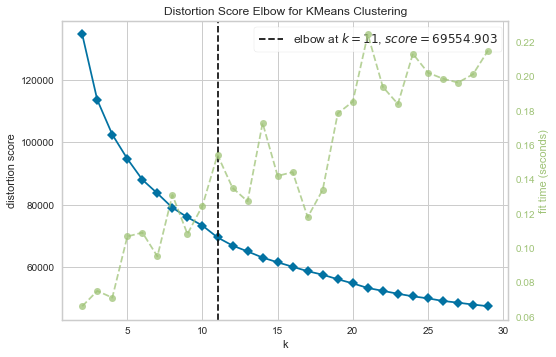

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
model = KMeans(n_clusters=k, **params)

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(scaled_features)        
visualizer.show()        

In [41]:
k1 = KneeLocator(range(1,21), cluster_errors , curve='convex', direction= 'decreasing')
k1.elbow

6

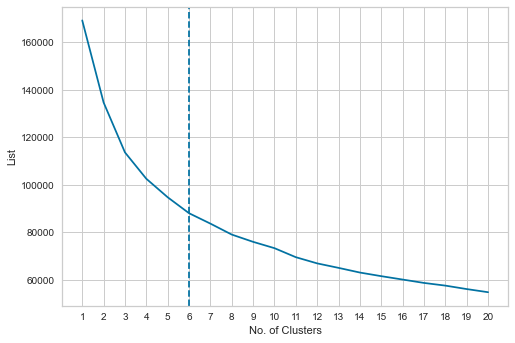

In [42]:
plt.plot(range(1, 21), cluster_errors)
plt.xticks(range(1, 21))
plt.xlabel('No. of Clusters')
plt.ylabel('List')
plt.axvline(x = k1.elbow, color='b', ls= '--')
plt.show()

### Silhouette Coefficient

In [43]:
silhouette_coefficients =[]
#min of clusters is 2
for k in range(2, 21):
    kmeans = KMeans(n_clusters = k, **params)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

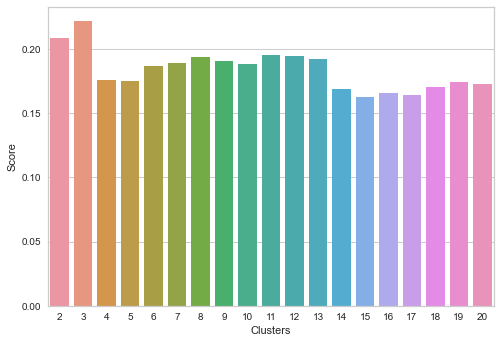

In [44]:
k = [i for i in range(2,21)]
ax = sns.barplot(x = k, y = silhouette_coefficients) # k = 3 seems to have the highest score
ax.set(xlabel = 'Clusters', ylabel = 'Score')
plt.show()

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3, n_init=10,
                                      random_state=0))

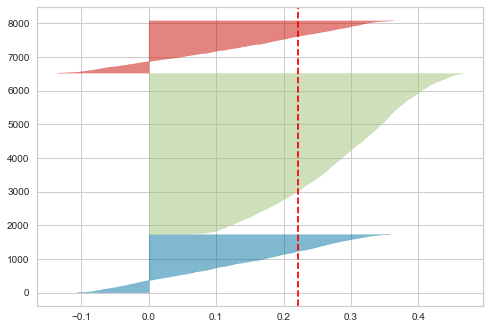

In [45]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 0)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(scaled_features)

### Dendograms

In [46]:
distance = linkage(scaled_features, 'ward')

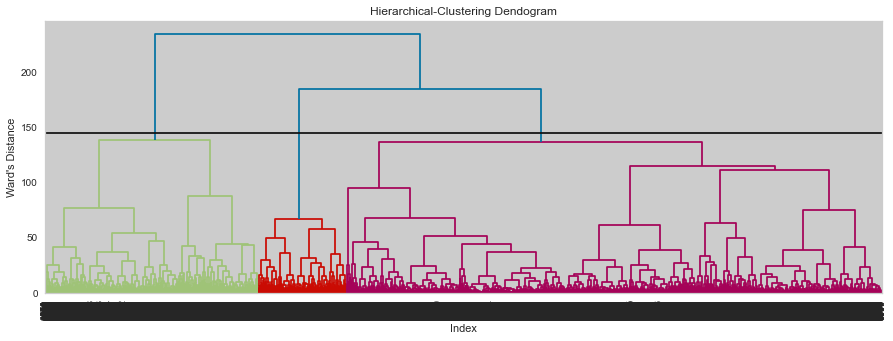

In [52]:
plt.figure(figsize=(15,5))
plt.title("Hierarchical-Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Ward's Distance")
dendrogram(distance, leaf_rotation=90, leaf_font_size=9); #Takes awhile to run!
plt.axhline(145, c='k')
plt.show()
#Based on the dendogram, to cut off the longest line the graph, we chose a line within 130 to 150. Hence, this gives us 3 main clusters.

In [47]:
km_model = KMeans(n_clusters = 3)
y_pred_km = km_model.fit_predict(scaled_features)

In [48]:
#centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = [clean_df.columns])
#centroids

In [49]:
clean_df['labels'] = km_model.labels_

In [50]:
clean_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'labels'],
      dtype='object')

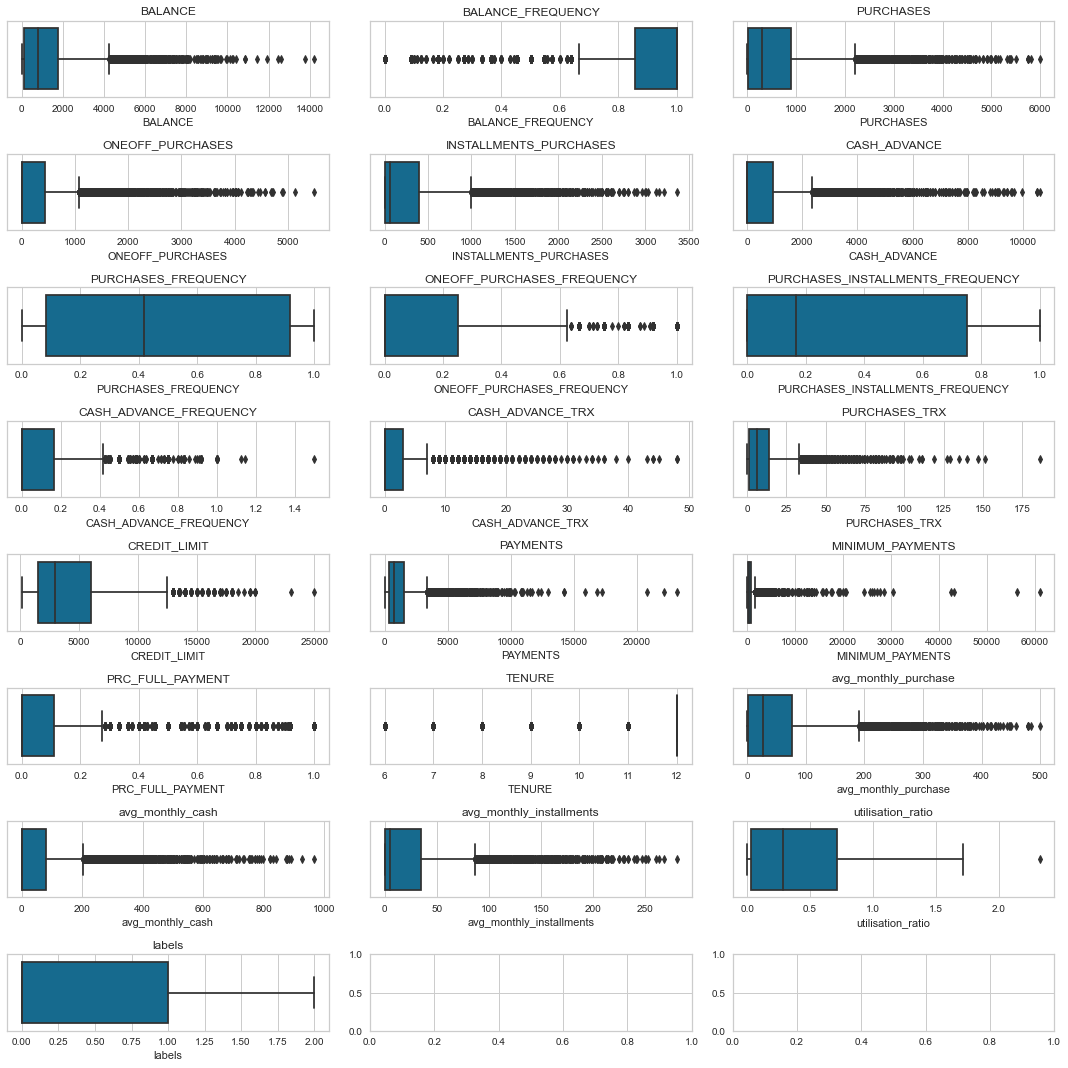

In [51]:
fig= plt.subplots(nrows = 8, ncols = 3, figsize=(15, 15))
for i in range (len(clean_df.columns)):
    plt.subplot(8, 3, i+1)
    ax =  sns.boxplot(x = clean_df[clean_df.columns[i]])
    plt.title(clean_df.columns[i])
    plt.tight_layout()

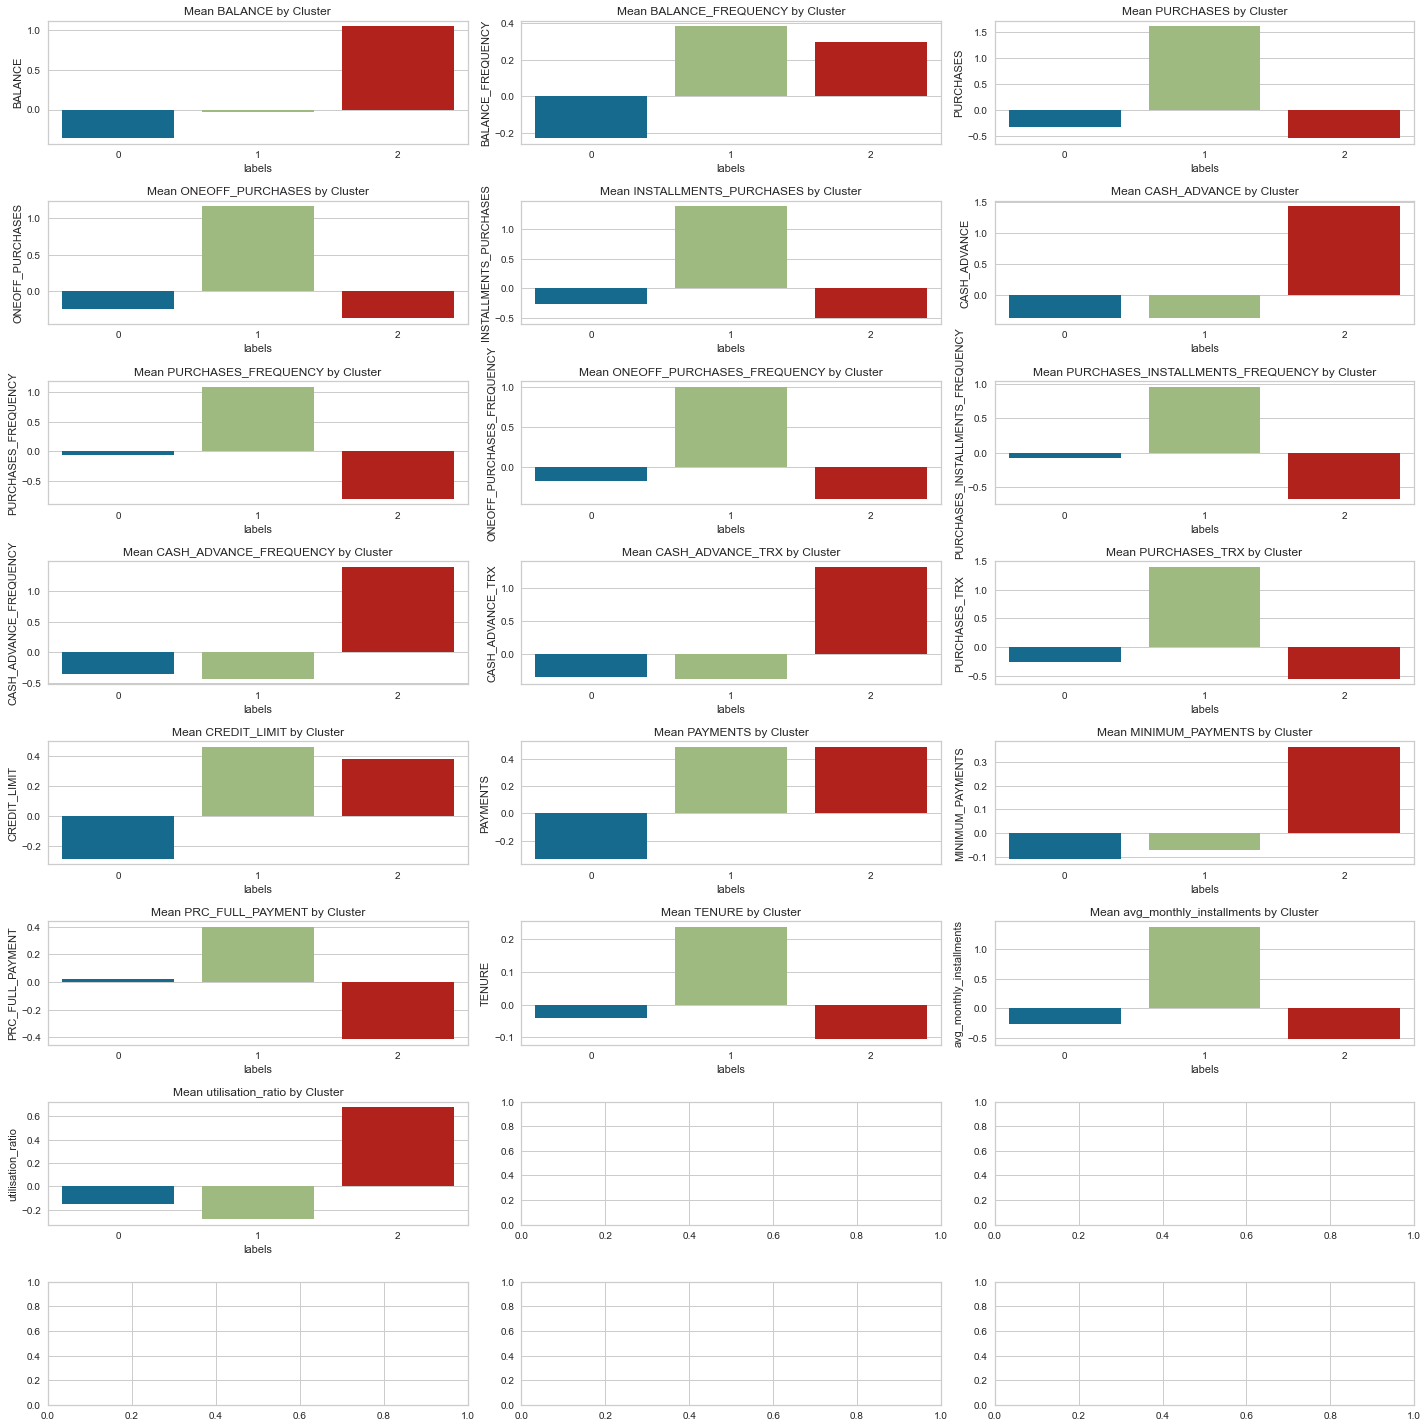

In [52]:
base_features = df.drop(columns = ['avg_monthly_purchase', 'avg_monthly_cash', 'type_of_purchase']).columns
fig = plt.subplots(nrows = 8, ncols = 3, figsize = (20,20))
counter = 0

for i in base_features:
    plt.subplot(8, 3, counter + 1)
    counter += 1
    ax = sns.barplot(x = scaled_df.groupby(clean_df['labels']).mean().index, 
                y = i, data = scaled_df.groupby(clean_df['labels']).mean())
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.tight_layout()

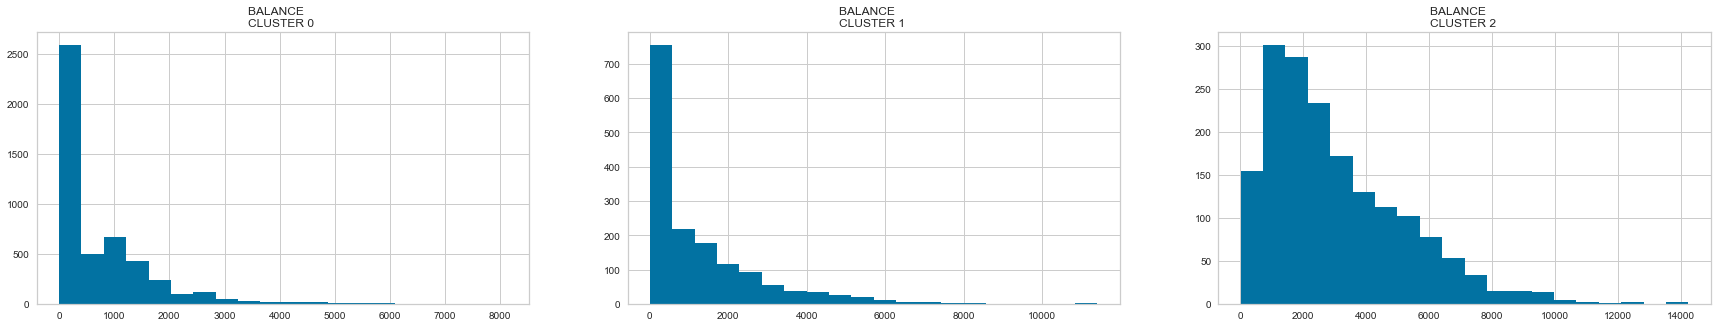

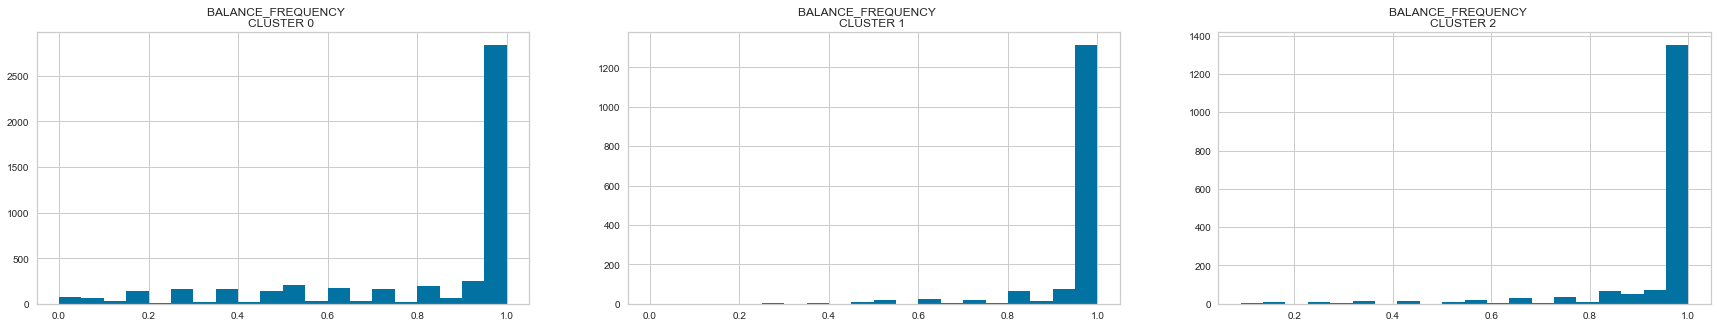

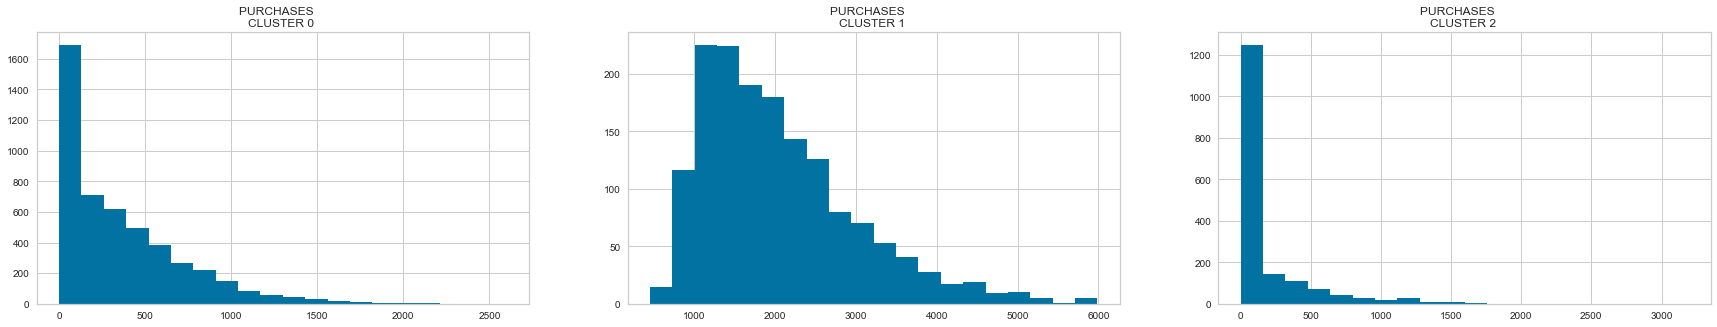

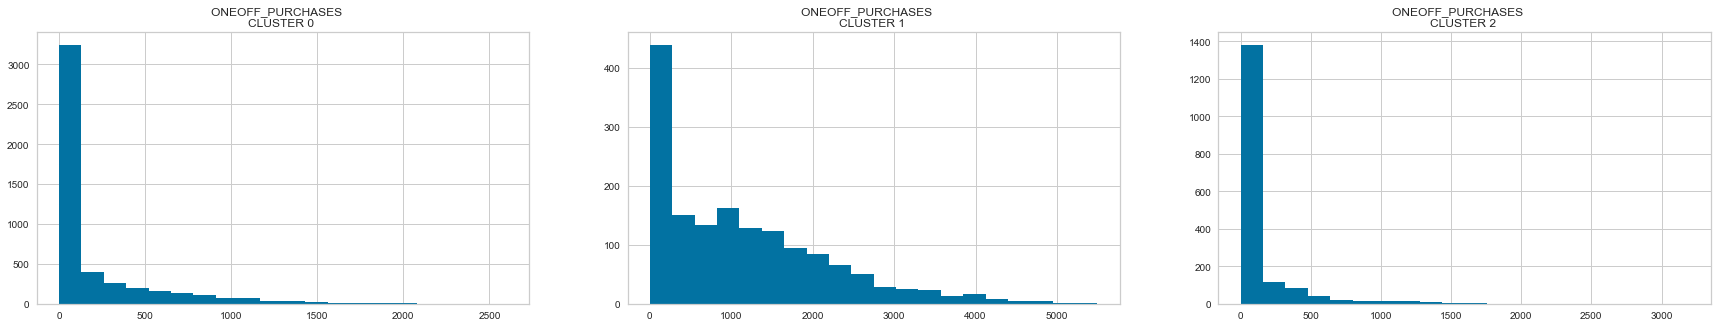

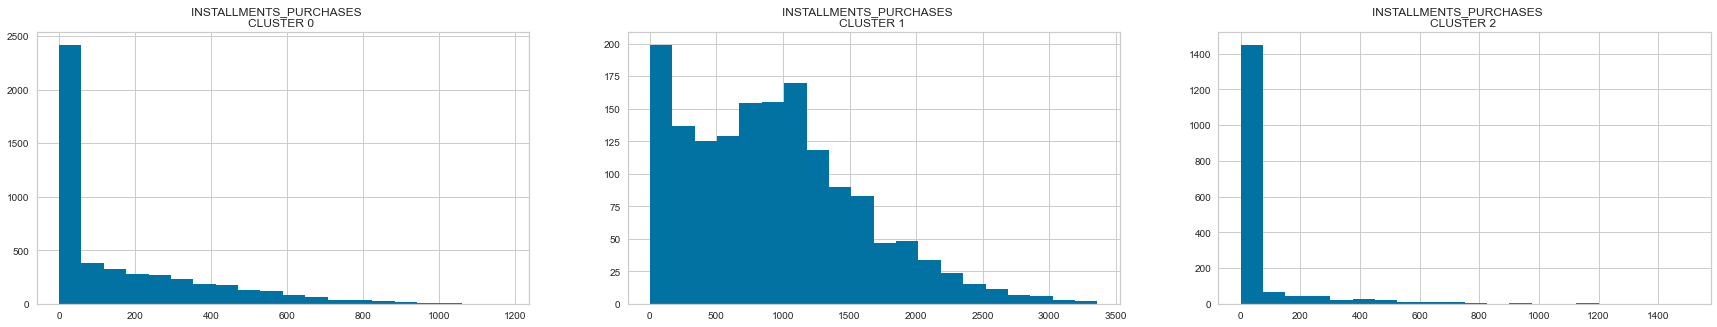

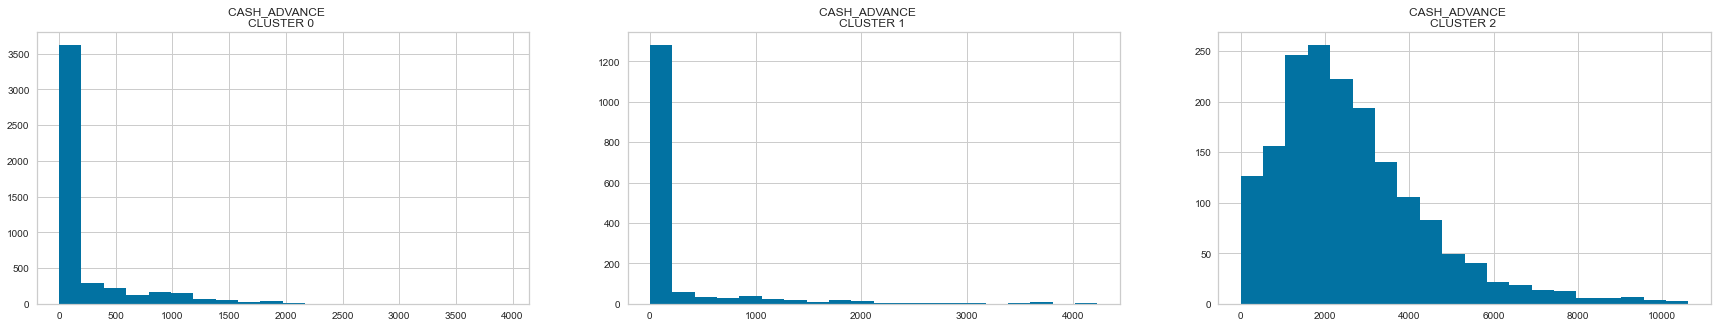

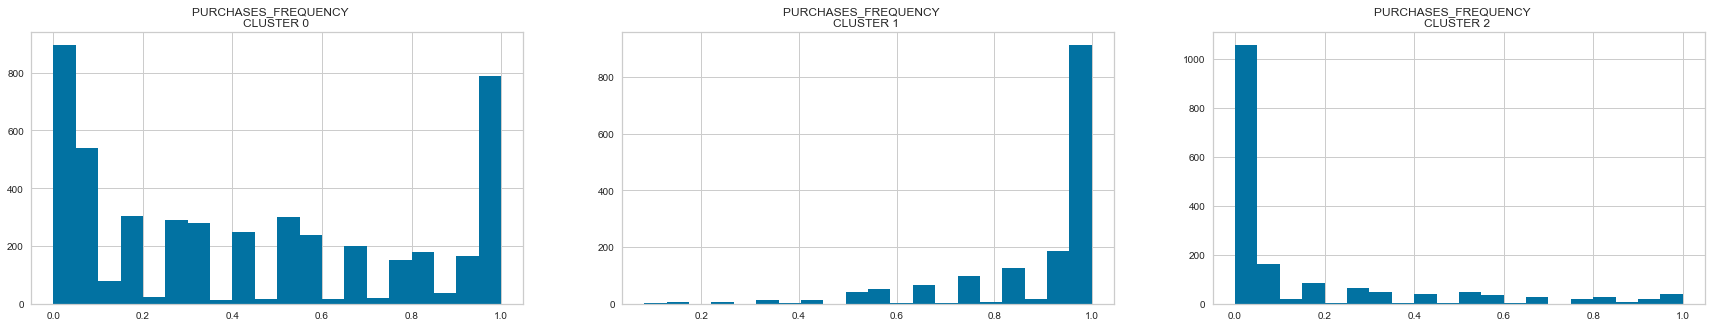

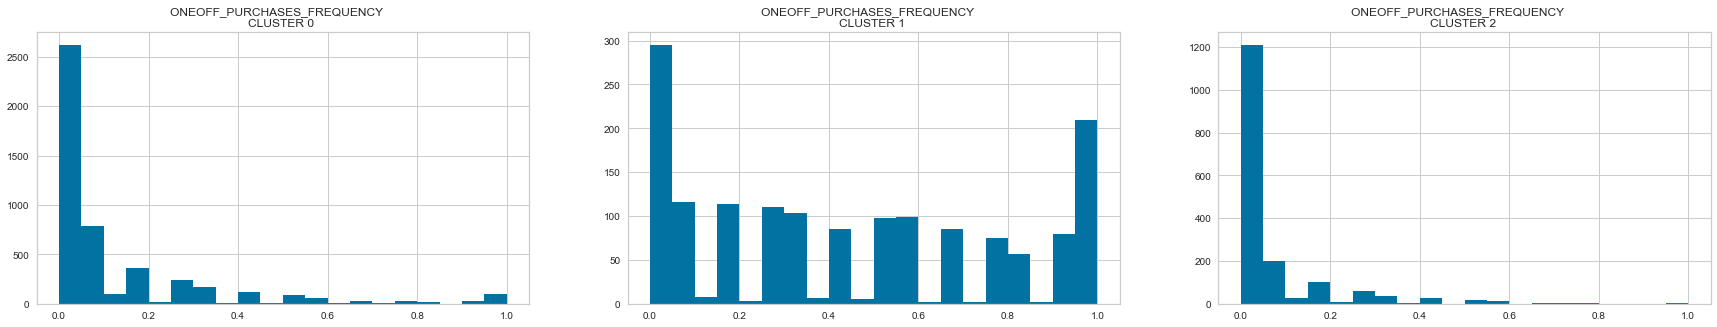

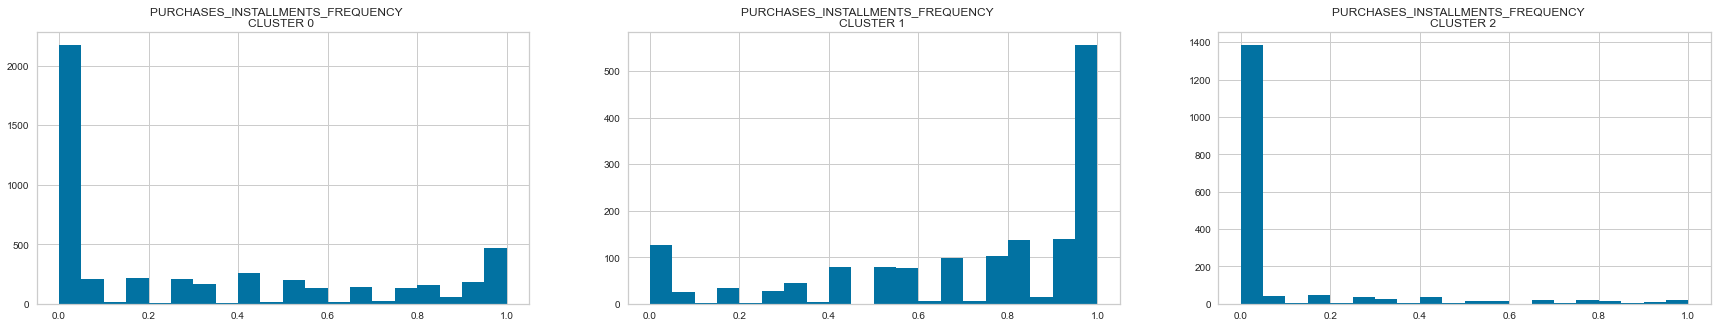

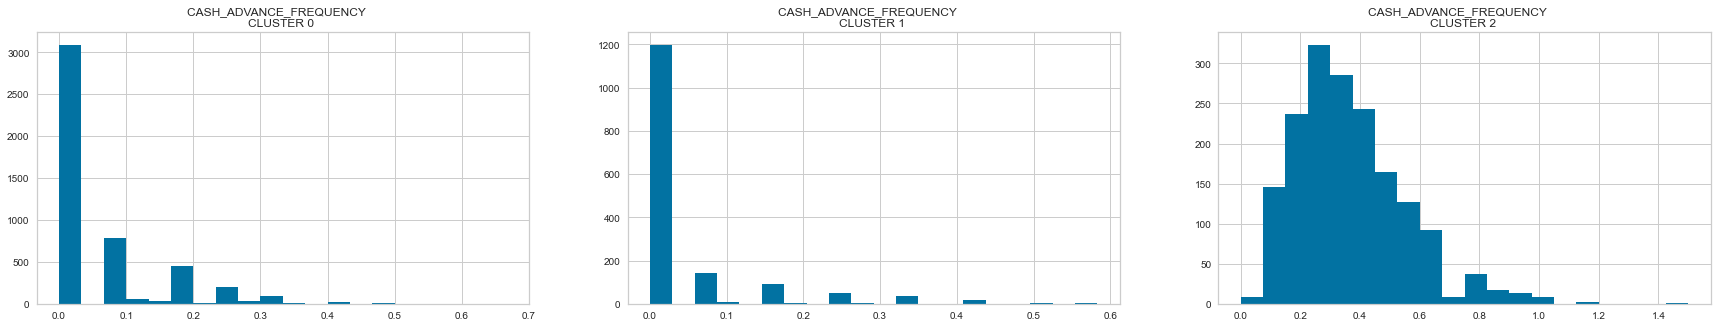

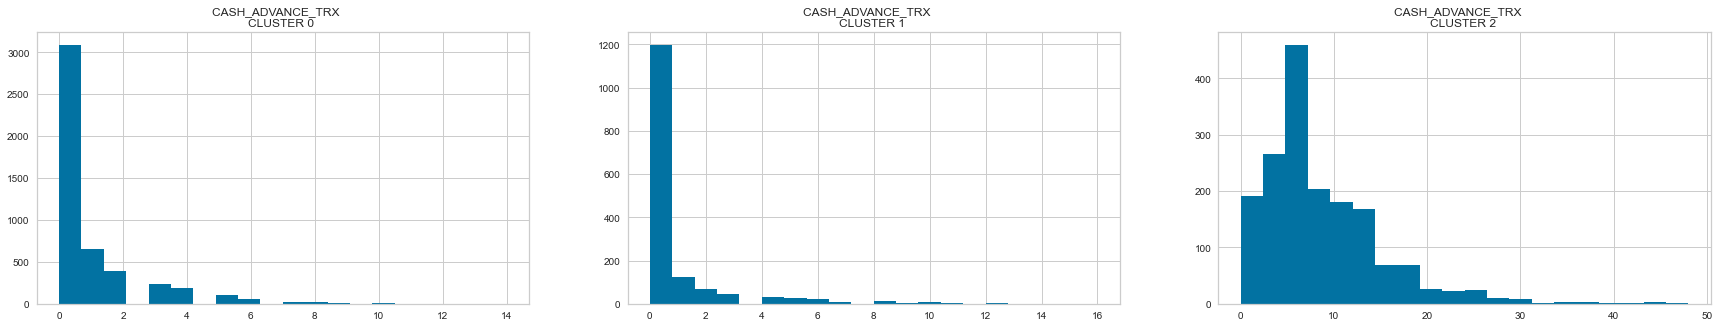

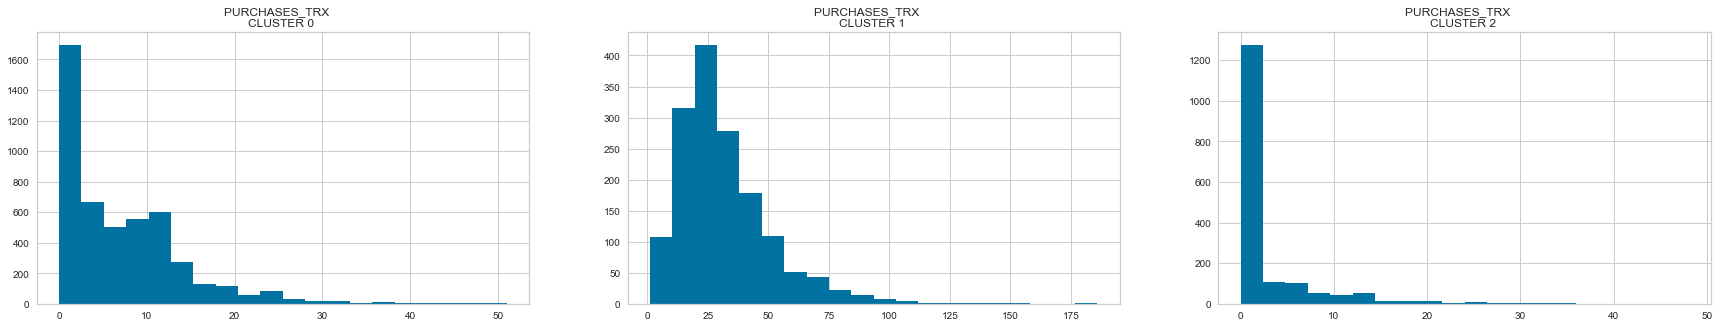

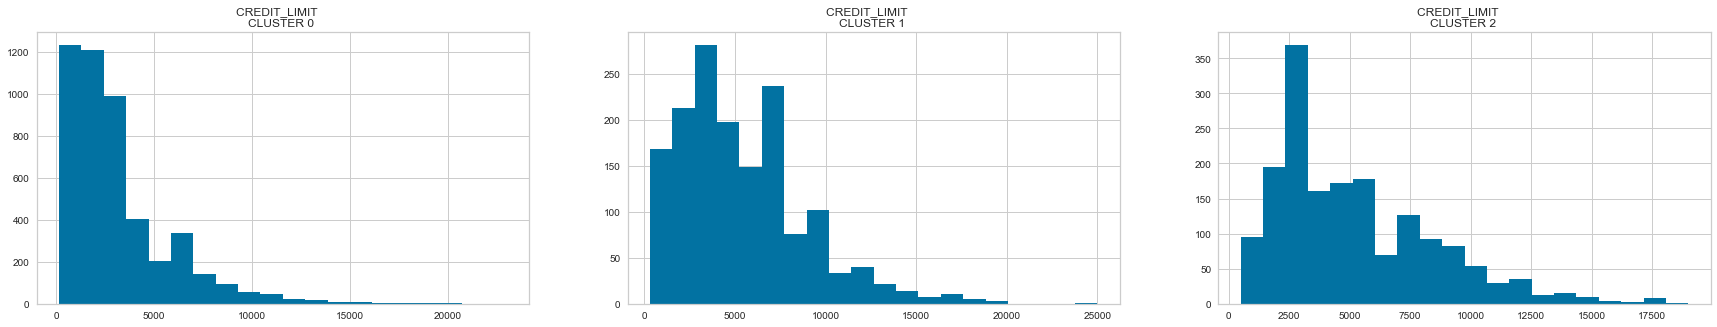

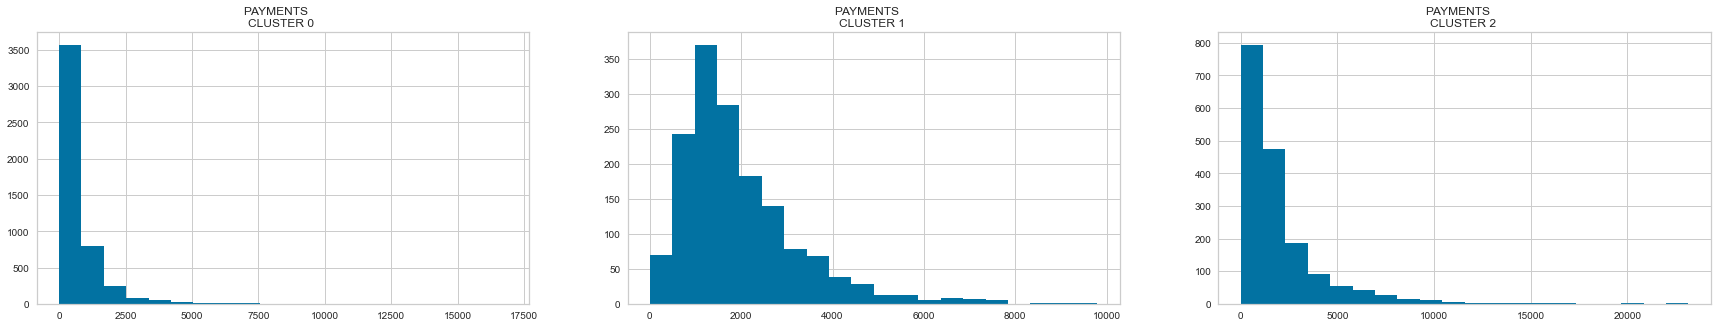

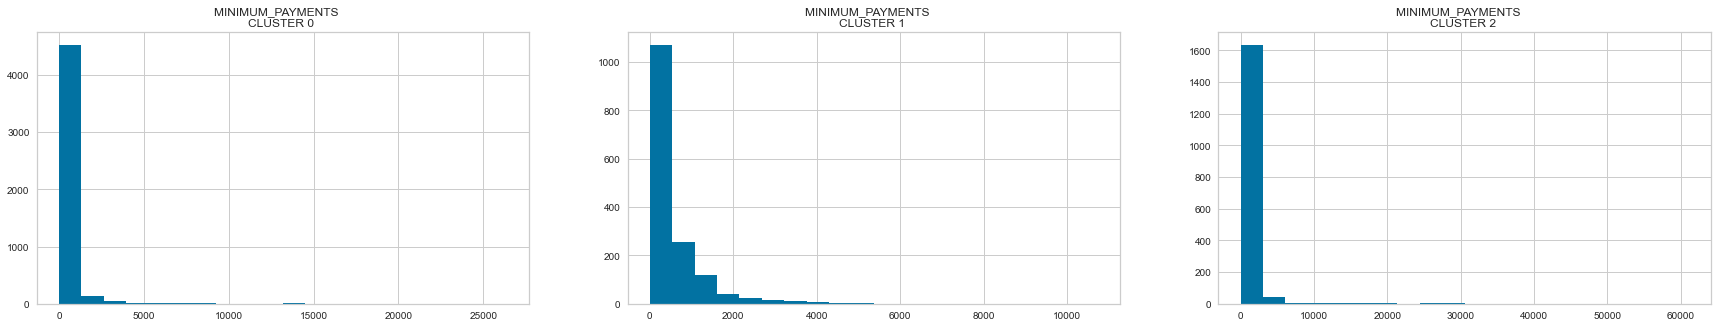

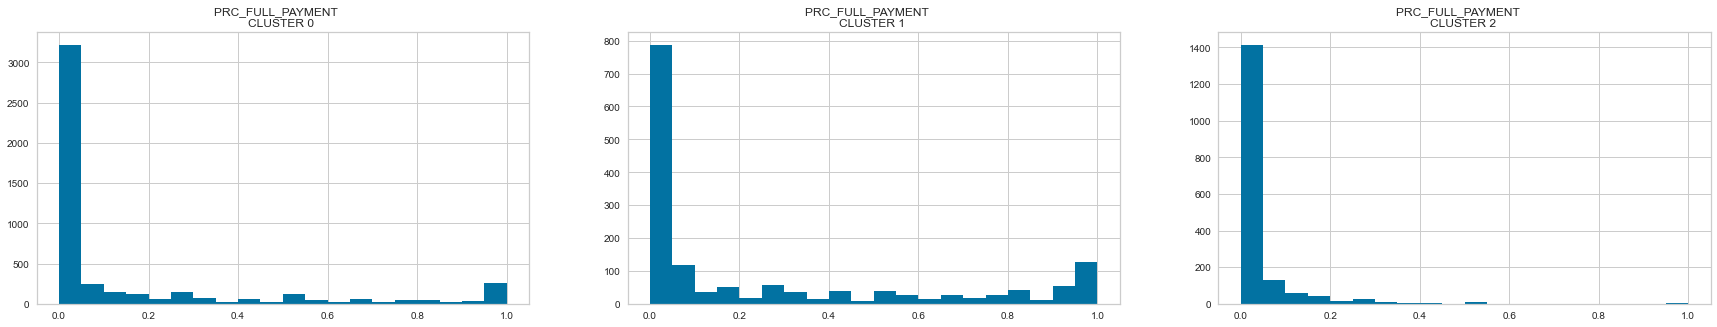

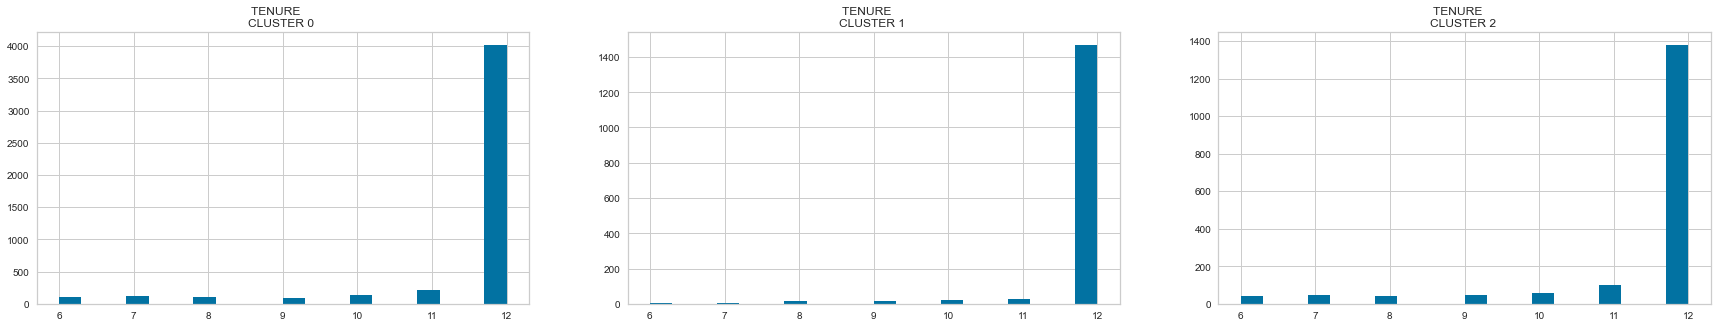

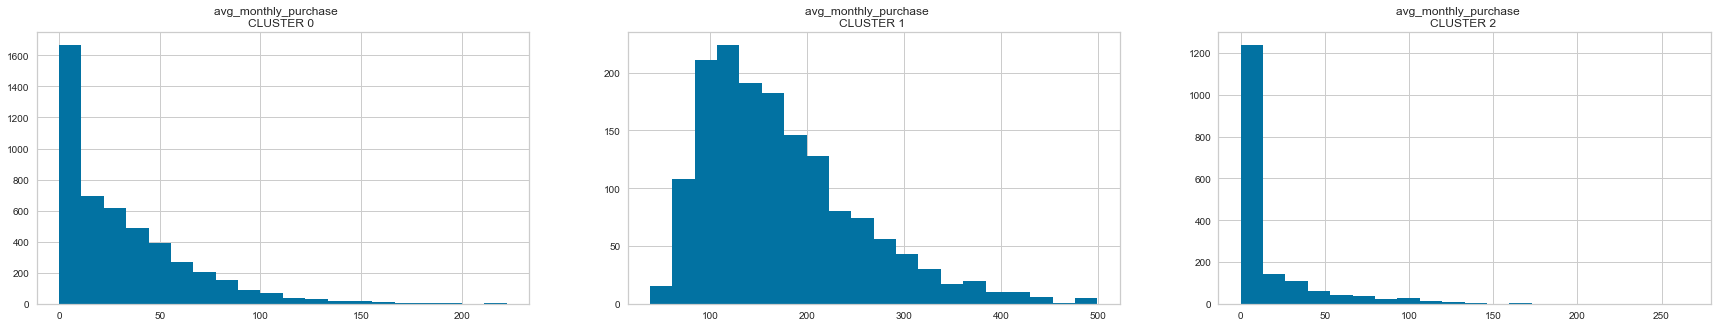

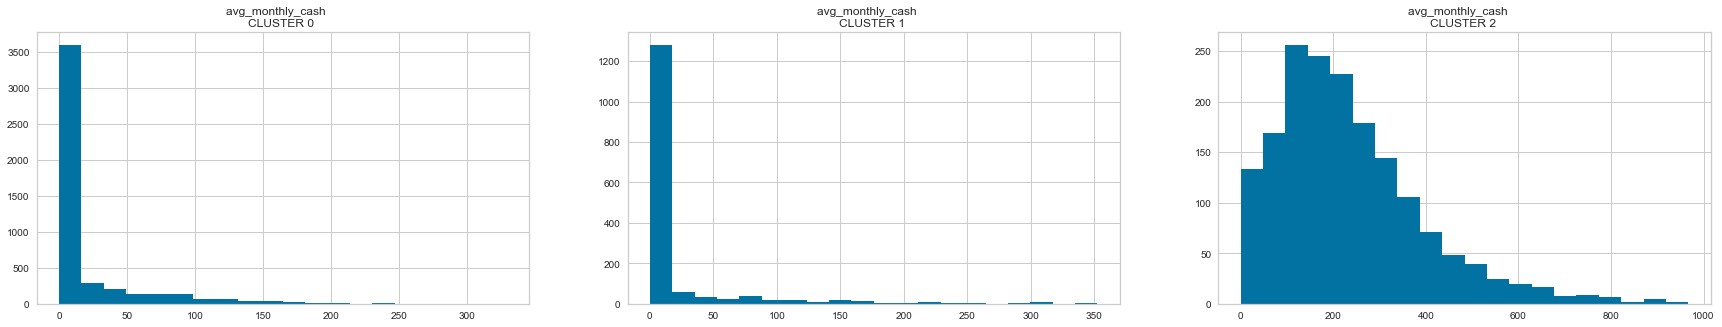

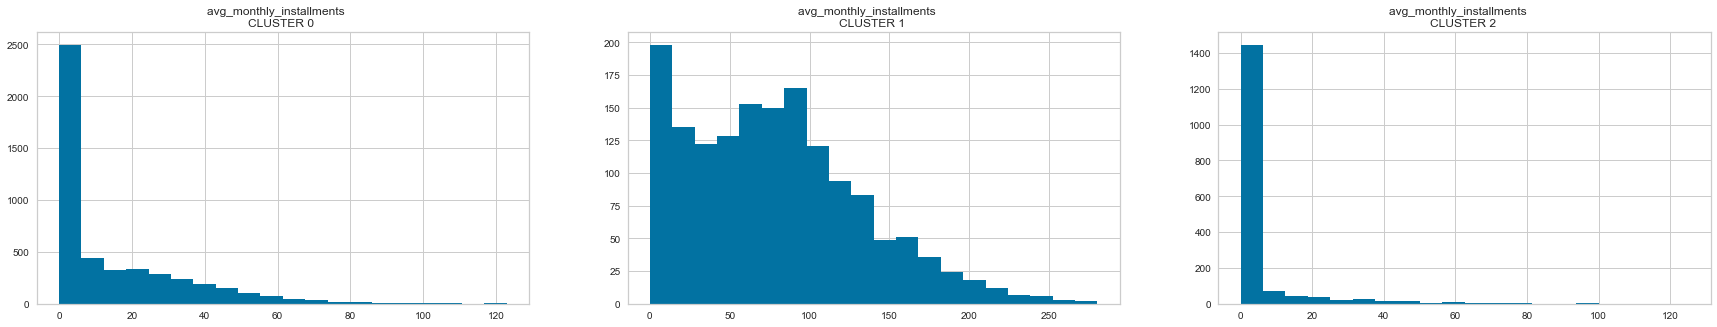

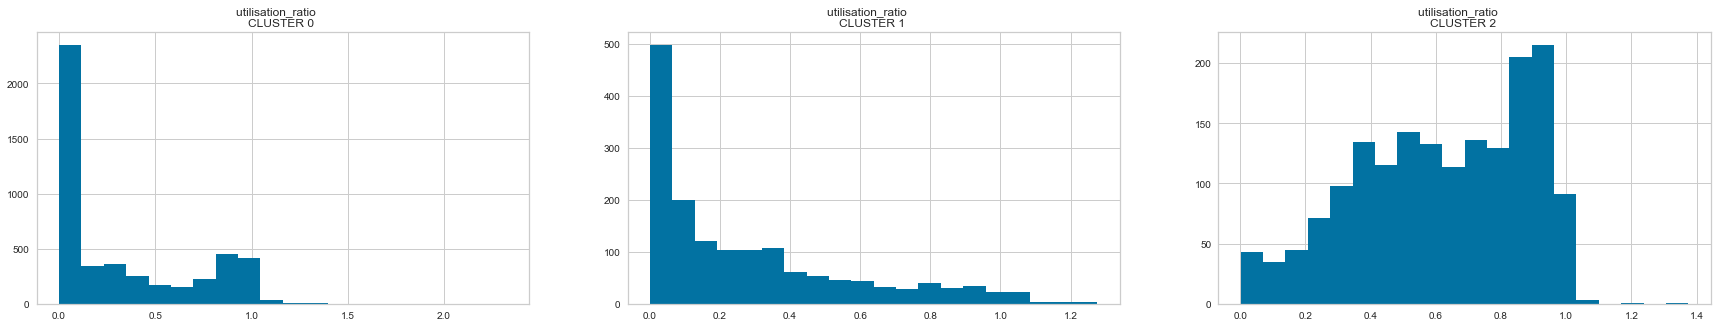

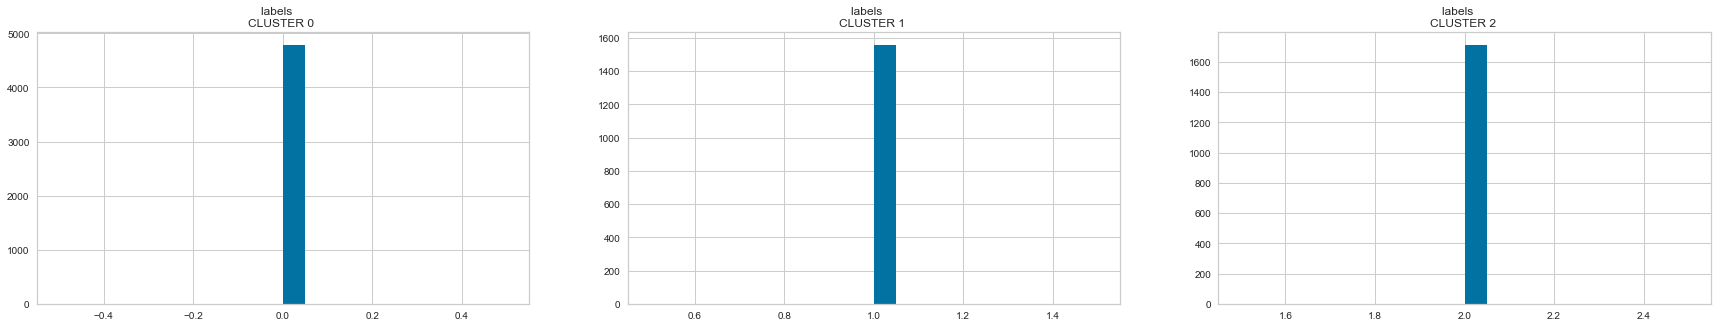

In [53]:
# Plot the histogram of various clusters
for i in clean_df.columns:
    plt.figure(figsize = (30, 5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        ax = clean_df[clean_df['labels'] == j]
        ax[i].hist(bins=20)
        plt.title('{}    \nCLUSTER {} '.format(i, j))
plt.show()

In [54]:
#Lets visualise the clusters in 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.863525,-2.314861
1,-3.976821,3.415223
2,1.139016,0.475867
3,0.079690,-0.090902
4,-1.413737,-1.502356


In [55]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': km_model.labels_})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.863525,-2.314861,0
1,-3.976821,3.415223,2
2,1.139016,0.475867,0
3,0.079690,-0.090902,0
4,-1.413737,-1.502356,0


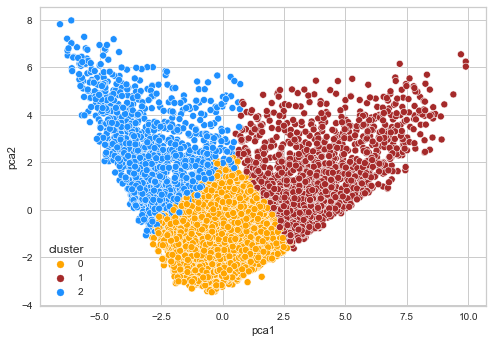

In [56]:
# Visualize the clusters in 2-axes plane
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette=['orange','brown','dodgerblue'])
plt.show()

## 4. Factor Analysis

In [57]:
x = clean_df.copy()
x = x.drop(columns = ['labels'])

In [58]:
chi_square_value, p_value = calculate_bartlett_sphericity(x)
chi_square_value, p_value #statistically significant

(269161.6661917409, 0.0)

KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated.

In [59]:
kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model) 
len(kmo_all)

0.7158798995525812


21

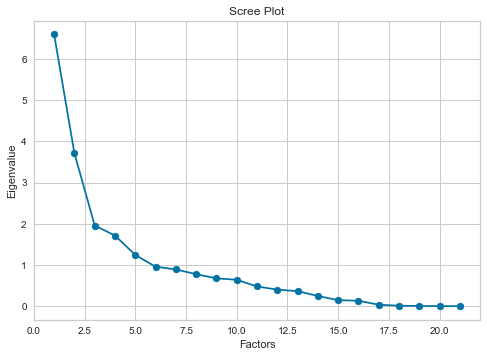

In [60]:
fa = FactorAnalyzer()
fa.fit(x, 19)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

#plot eigenvector values
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()
#Use 3 factors here since the drop is huge on 3 factors onwards

In [61]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(pd.DataFrame(fa.loadings_,index=x.columns))

                                         0         1         2
BALANCE                          -0.072172  0.712152  0.135423
BALANCE_FREQUENCY                 0.177438  0.300179  0.172882
PURCHASES                         0.475883 -0.093511  0.845341
ONEOFF_PURCHASES                 -0.027897 -0.093235  0.972028
INSTALLMENTS_PURCHASES            0.906916 -0.047976  0.202856
CASH_ADVANCE                     -0.146347  0.843573 -0.081641
PURCHASES_FREQUENCY               0.693940 -0.284895  0.329292
ONEOFF_PURCHASES_FREQUENCY        0.044069 -0.125471  0.726256
PURCHASES_INSTALLMENTS_FREQUENCY  0.831937 -0.206925  0.060205
CASH_ADVANCE_FREQUENCY           -0.201675  0.758133 -0.131898
CASH_ADVANCE_TRX                 -0.162361  0.729156 -0.110393
PURCHASES_TRX                     0.594866 -0.107675  0.534599
CREDIT_LIMIT                      0.047306  0.255170  0.305260
PAYMENTS                          0.094049  0.343867  0.304880
MINIMUM_PAYMENTS                  0.006077  0.244920 -0

In [62]:
#Factor 1: 
factor_1 = pd.DataFrame(fa.loadings_,index=x.columns)
factor_1 = factor_1[factor_1[0] >= 0.6]
print("Factor 1: ", factor_1.index)

#Factor 2:
factor_2 = pd.DataFrame(fa.loadings_,index=x.columns)
factor_2 = factor_2[factor_2[1] >= 0.6]
print("Factor 2: ", factor_2.index)

#Factor 3: 
factor_3 = pd.DataFrame(fa.loadings_,index=x.columns)
factor_3 = factor_3[factor_3[2] >= 0.6]
print("Factor 3: ", factor_3.index)

Factor 1:  Index(['INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'avg_monthly_installments'],
      dtype='object')
Factor 2:  Index(['BALANCE', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'avg_monthly_cash'],
      dtype='object')
Factor 3:  Index(['PURCHASES', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY',
       'avg_monthly_purchase'],
      dtype='object')


In [63]:
#Create the factors
factor1 = x[factor_1.index]
factor2 = x[factor_2.index]
factor3 = x[factor_3.index]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)
#Factor 3 isnt as useful compared to factors 1 and 2

(0.19368170993161327, array([0.165, 0.222])) (0.4805182572423361, array([0.462, 0.498])) (0.6639947099772634, array([0.652, 0.676]))


In [64]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                        0         1         2
Variance          3.86989  3.839038  3.657354
Proportional Var  0.18428  0.182811  0.174160
Cumulative Var    0.18428  0.367092  0.541252


In [65]:
# Communality is the proportion of each variable’s variance 
# that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.
print(pd.DataFrame(fa.get_communalities(), index=x.columns, columns=['Communalities']))

                                  Communalities
BALANCE                                0.530709
BALANCE_FREQUENCY                      0.151480
PURCHASES                              0.949810
ONEOFF_PURCHASES                       0.954310
INSTALLMENTS_PURCHASES                 0.865948
CASH_ADVANCE                           0.739697
PURCHASES_FREQUENCY                    0.671151
ONEOFF_PURCHASES_FREQUENCY             0.545133
PURCHASES_INSTALLMENTS_FREQUENCY       0.738561
CASH_ADVANCE_FREQUENCY                 0.632836
CASH_ADVANCE_TRX                       0.570216
PURCHASES_TRX                          0.651256
CREDIT_LIMIT                           0.160533
PAYMENTS                               0.220041
MINIMUM_PAYMENTS                       0.060071
PRC_FULL_PAYMENT                       0.151995
TENURE                                 0.021303
avg_monthly_purchase                   0.926937
avg_monthly_cash                       0.705774
avg_monthly_installments               0

In [190]:
#Adjust Features here
Purchase = ["PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES",
                      'ONEOFF_PURCHASES', 'BALANCE', #'PAYMENTS', 
                      "CREDIT_LIMIT", 'labels']

Count = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'labels']

Frequency = ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY', 'labels']

all_features = [Purchase, Count, Frequency]

## 5. Behavioural Analysis

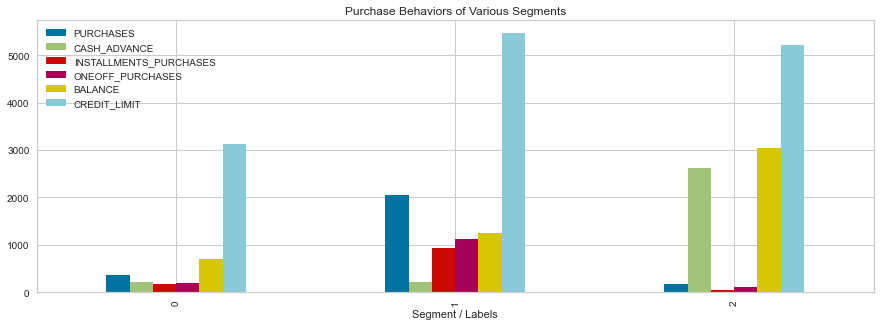

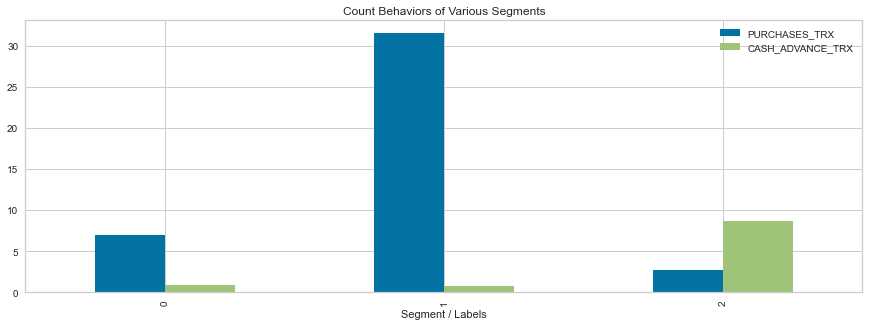

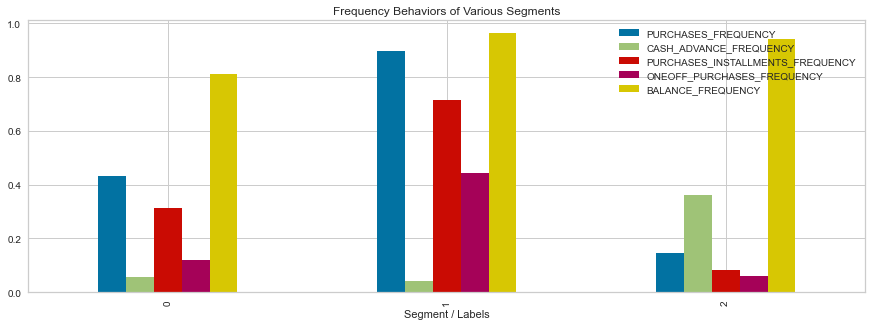

In [193]:
counter = 0
for i in all_features:
    name = ''
    if counter == 0:
        name = 'Purchase'
    elif counter == 1:
        name = 'Count'
    else:
        name = 'Frequency'
    counter += 1
    
    clean_df[i].groupby(['labels']).mean().plot.bar(figsize = (15,5))
    plt.title(f'{name} Behaviors of Various Segments')
    plt.xlabel('Segment / Labels');
    plt.show()
    

1. Cluster 0: In this segment, people tend to have lower credit limit. Additionally, it can be observed that these customers are not avid users of the credit card since the it visually shows that they tend to spend very little with the credit card

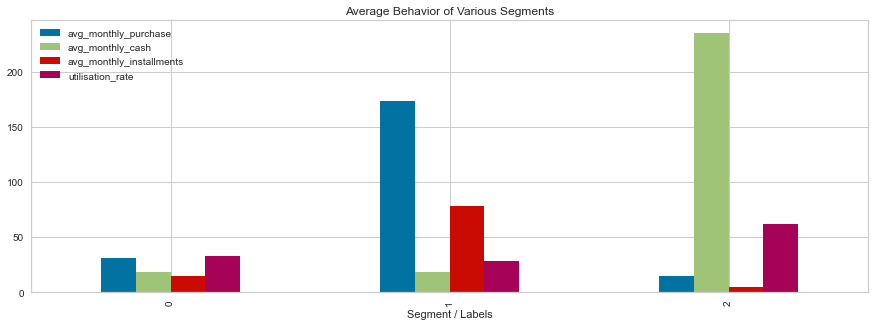

In [69]:
#'avg_monthly_payments' either way if they use the card, they'll make payments
avg_features = ['avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_installments', 'utilisation_rate', 'labels']
analysis_df = clean_df.copy()
analysis_df['utilisation_rate'] = analysis_df['utilisation_ratio'] * 100

analysis_df[avg_features].groupby("labels").mean().plot.bar(figsize=(15, 5))

plt.title('Average Behavior of Various Segments')
plt.xlabel('Segment / Labels');
plt.show()

In [70]:
avg_behavior_df = clean_df.groupby("labels")[['avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_installments', 'utilisation_ratio']].mean()
avg_behavior_df = pd.DataFrame(MinMaxScaler().fit_transform(avg_behavior_df), 
                            index=avg_behavior_df.index, columns=avg_behavior_df.columns)
avg_behavior_df

,avg_monthly_purchase,avg_monthly_cash,avg_monthly_installments,utilisation_ratio
labels,,,,
0,0.107599,0.002747,0.132491,0.132665
1,1.000000,0.000000,1.000000,0.000000
2,0.000000,1.000000,0.000000,1.000000


In [71]:
# colours = ["rgba(255, 0, 0, 0.3)","rgba(0, 0, 255, 0.3)", "rgba(60, 179, 113, 0.3)", "rgba(238, 130, 238, 0.3)", 
#            "rgba(255, 165, 0, 0.3)", "rgba(106, 90, 205, 0.3)", "rgba(255, 99, 71, 0.3)"]

# #Plot radar plot to see the general attributes for each body type.
# for i in range(len(avg_behavior_df.index)):
#     idx = avg_behavior_df.index[i]
#     c = colours[i]
#     fig = go.Figure(data=go.Scatterpolar(r=avg_behavior_df.loc[idx], theta=avg_behavior_df.columns, 
#                                          fill="toself", line_color=c, fillcolor=c, name=str(idx)),
#                     layout=go.Layout(polar={"radialaxis": {"showticklabels": False}}, showlegend=True))
#     fig.show()

## 6. Multinomial Logistic Regression

In [72]:
X = clean_df.copy()
y = X['labels']
X = X.drop(columns = ['labels'], axis = 1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 0)

In [74]:
#transformer = FactorAnalysis(n_components=3, random_state=0)

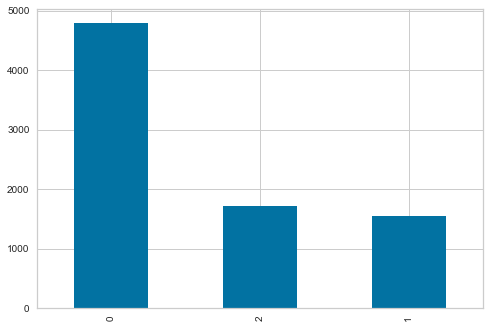

In [75]:
y.value_counts().plot(kind = 'bar')
plt.show()

In [76]:
lr_model = make_pipeline(StandardScaler(), #transformer, 
                         LogisticRegression(multi_class='auto', random_state = 0))
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

Accuracy:  0.9968963376784605
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       957
           1       0.99      1.00      1.00       311
           2       0.99      1.00      1.00       343

    accuracy                           1.00      1611
   macro avg       1.00      1.00      1.00      1611
weighted avg       1.00      1.00      1.00      1611



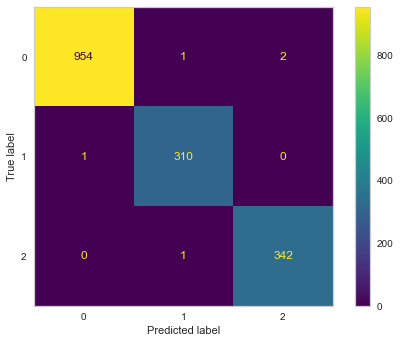

In [77]:
print('Accuracy: ', accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))
cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

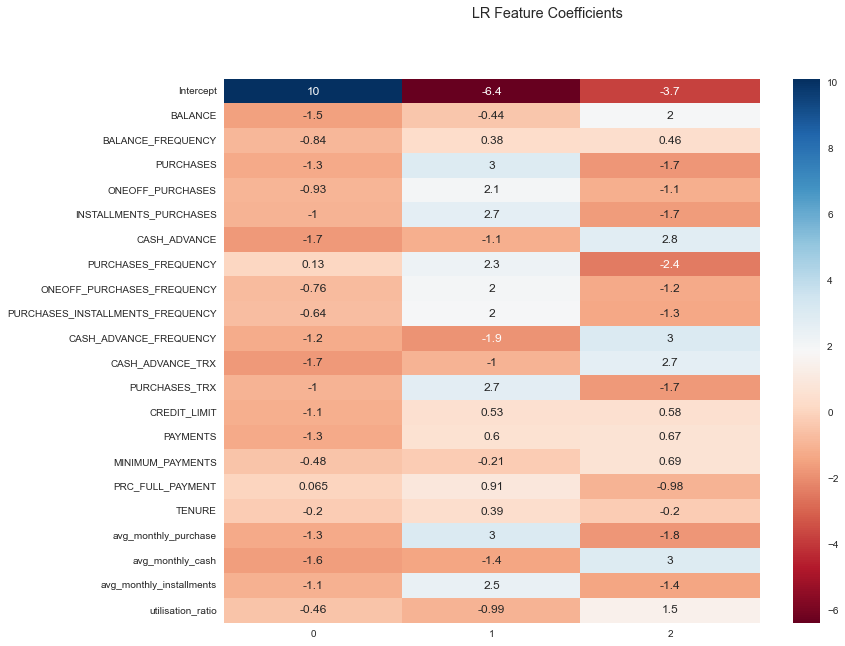

In [78]:
lr_coef = pd.DataFrame(lr_model.named_steps['logisticregression'].coef_, columns = X.columns).T
# lr_coef = pd.DataFrame(lr_model.named_steps['logisticregression'].coef_, 
#                       columns = lr_model.named_steps['factoranalysis'].get_feature_names_out()).T
lr_bias = pd.DataFrame(lr_model.named_steps['logisticregression'].intercept_, columns = ['Intercept']).T
lr_weights = pd.concat([lr_bias, lr_coef], axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(lr_weights.round(3), annot = True, cmap='RdBu', ax = ax)
plt.suptitle('LR Feature Coefficients')
plt.show()

Based on the results, we can see that the logistic regression model is able to classify the dataset accordingly with high performance in every aspect. This leads us to explore the individual features that are distinct from each other. We can explore this using Linear Regression model to model the relationship between a continuous dependent variable with other independent variables.

## 7. Linear Discriminant Analysis (Used for Testing/Trying out)

In [79]:
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

lda_model = make_pipeline(StandardScaler(), #transformer, 
                          LinearDiscriminantAnalysis(n_components = 2))
lda_model.fit(X_train1, y_train1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2))])

In [87]:
X_test1 = np.array(X_test)
y_test1 = np.array(y_test)

lda_y_pred = lda_model.predict(X_test1)

Accuracy:  0.9180633147113594
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       295
           1       0.88      1.00      0.94       951
           2       0.99      0.80      0.89       365

    accuracy                           0.92      1611
   macro avg       0.95      0.87      0.90      1611
weighted avg       0.93      0.92      0.92      1611



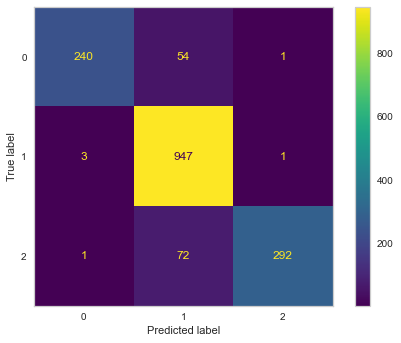

In [88]:
print("Accuracy: ", accuracy_score(y_test1, lda_y_pred))
print(classification_report(y_test1, lda_y_pred))
cm = confusion_matrix(y_test1, lda_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lda_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

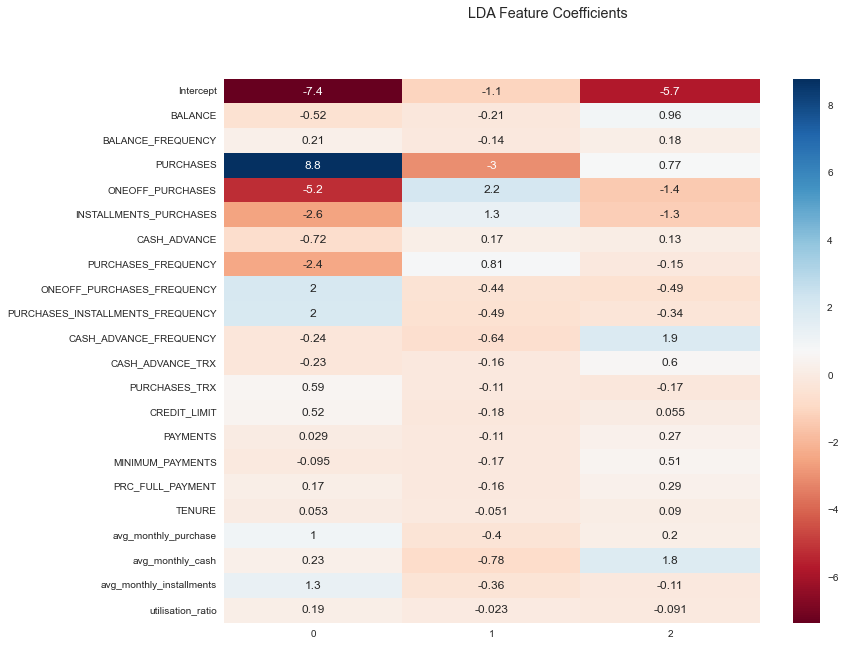

In [89]:
lda_coef = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].coef_, columns = X.columns).T
# lda_coef = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].coef_, 
#                        columns = lda_model.named_steps['factoranalysis'].get_feature_names_out()).T
lda_bias = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].intercept_, columns = ['Intercept']).T
lda_weights = pd.concat([lda_bias, lda_coef], axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(lda_weights.round(3), annot = True, cmap='RdBu', ax = ax)
plt.suptitle('LDA Feature Coefficients')
plt.show()

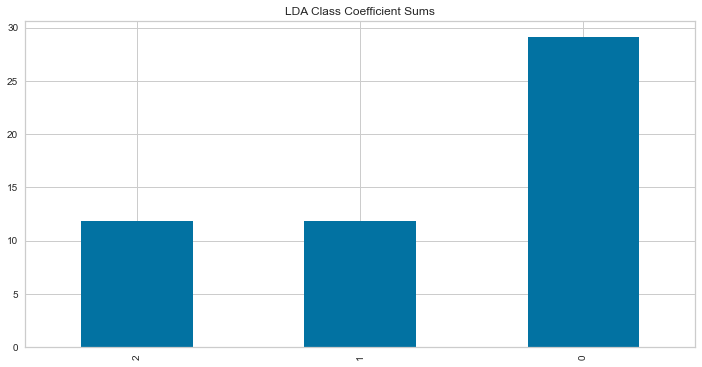

In [90]:
pd.Series(np.abs(lda_model.named_steps['lineardiscriminantanalysis'].coef_).sum(axis=1), 
          index=lda_model.named_steps['lineardiscriminantanalysis'].classes_).sort_values().plot.bar(
    figsize=(12, 6), title="LDA Class Coefficient Sums"
)
plt.show()
#Cluster 2, 0 is much more separable than 1

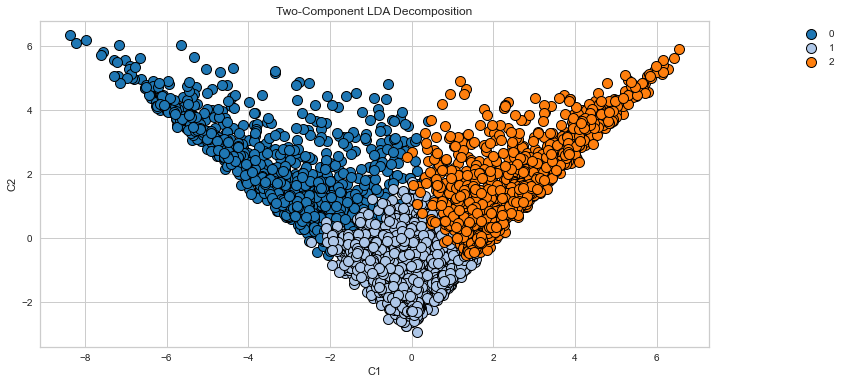

In [91]:
X_hat = lda_model.fit_transform(X, y)

import matplotlib as mpl

colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories

ret = pd.DataFrame(
    {'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))}
)

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret.query('Type == @cat').plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='black', linewidth=1,
                       title='Two-Component LDA Decomposition').legend(bbox_to_anchor=(1.2, 1))
    )
#Classifying the different clusters of credit customers are linearly distinguishable by the numerical values alone.

## 8. OLS Linear Regression Model

In [80]:
clean_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio', 'labels'],
      dtype='object')

In [81]:
#The goal is to identify a feature that is distinct from the rest so we can possibly exploit it for the business to work on.

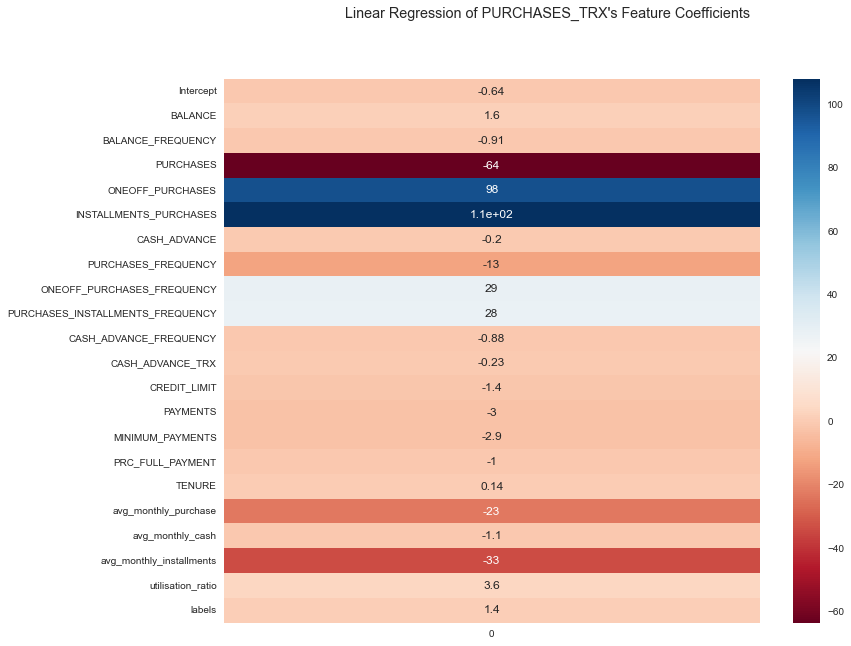

In [82]:
#Edit here to test out different target variables and the scaling involved.
target = 'PURCHASES_TRX'
scaling_technique = MinMaxScaler()
############################

clf_x = clean_df.drop(columns = [target], axis = 1)
clf_y = clean_df[target]
                    
#Linear Regression Model    
clf_model = make_pipeline(scaling_technique, LinearRegression())
clf_model.fit(clf_x, clf_y)
clf_y_pred = clf_model.predict(clf_x)

#Weights output
clf_coef = pd.DataFrame([clf_model.named_steps['linearregression'].coef_], columns = clf_x.columns).T
clf_bias = pd.DataFrame([clf_model.named_steps['linearregression'].intercept_], columns = ['Intercept']).T
clf_weights = pd.concat([clf_bias, clf_coef], axis = 0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(clf_weights.round(2), annot = True, cmap='RdBu', ax = ax)
plt.suptitle(f'Linear Regression of {target}\'s Feature Coefficients')
plt.show()


In [86]:
sm_model = sm.OLS(clf_y, clf_x).fit()
print(sm_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          PURCHASES_TRX   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              1714.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:02:41   Log-Likelihood:                         -27986.
No. Observations:                8054   AIC:                                  5.601e+04
Df Residuals:                    8033   BIC:                                  5.616e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

The values we are concerned with are -

- The coefficients and significance (p-values)
- R-squared
- F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV. This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.